<a href="https://colab.research.google.com/github/Lechi1/inspection-route/blob/main/sigap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Released Noted
1. Hapus Duplikat Solusi (sigap ver 002)



2. mengubah struktur individu (sigap ver 003)
                    [
                      [[rute_kendaraan_1_hari_1], [rute_kendaraan_1_hari_2], ...],
                    [[rute_kendaraan_2_hari_1], [rute_kendaraan_2_hari_2], ...],
                    ...
                    ]

3. Memiliki 3 Objektif
4. Menambah constraint, modifikasi crossover agar memenuhi constraint

In [63]:
!git clone https://github.com/Lechi1/inspection-route.git


fatal: destination path 'inspection-route' already exists and is not an empty directory.


In [71]:
!git config --global user.email "ikeidiara89@gmail.com"
!git config --global user.name "Ike Ayu"
!git config --global --list


user.email=ikeidiara89@gmail.com
user.name=Ike Ayu


In [74]:
!git branch -M main
!git status


On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	inspection-route/
	sigap ver 004 .ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [72]:
!git add README.md
!git commit -m "Initial commit: Add README.md"
!git push origin main


fatal: pathspec 'README.md' did not match any files
On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	inspection-route/
	sigap ver 004 .ipynb

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Lechi1/inspection-route.git'


In [64]:
%cd inspection-route


/content/inspection-route/inspection-route


In [67]:
!cp "/content/drive/My Drive/Colab Notebooks/sigap ver 004 .ipynb" "./"


In [69]:
!git add .
!git commit -m "Add project files"


error: 'inspection-route/' does not have a commit checked out
fatal: adding files failed
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@4d8f019f5302.(none)')


In [ ]:
# @title Load Data
import pandas as pd
import numpy as np
from random import shuffle, choice
from joblib import dump, load
import os
from tqdm import tqdm
from math import radians, cos, sin, asin, sqrt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load customer data dengan separator koma dan melewati baris yang bermasalah
data = pd.read_csv('/content/drive/My Drive/tesis/df_matched_pasca.csv', sep=',', on_bad_lines='skip')
data_pra  = pd.read_csv('/content/drive/My Drive/tesis/df_matched_pra.csv', sep=',', on_bad_lines='skip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-fb5d611c641d>:15: DtypeWarning: Columns (7,8,13,14,26,30,38,49,53,54,62,63,64,82,83,95,96,120,121,217,221) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/tesis/df_matched_pasca.csv', sep=',', on_bad_lines='skip')
<ipython-input-15-fb5d611c641d>:16: DtypeWarning: Columns (14,53,54,56,60,64,83,95,96,116,215,221) have mixed types. Specify dtype option on import or set low_memory=False.
  data_pra  = pd.read_csv('/content/drive/My Drive/tesis/df_matched_pra.csv', sep=',', on_bad_lines='skip')


In [ ]:
# Menampilkan lima baris pertama dari data
data_pra.head()

V_BULAN_REKAP         IDPEL  UNITUPI  UNITAP  UNITUP                  NAMA  \
0         202312  522510000013       52   52250   52251              KASMIAAH   
1         202312  522510000183       52   52250   52251  HO HADI SINTORO, SE.   
2         202312  522510001621       52   52250   52251      PEGADAIAN NEGARA   
3         202312  522510001895       52   52250   52251             H MUSTOFA   
4         202312  522510002728       52   52250   52251                 MARIA   

        NAMAPNJ NOBANG KETNOBANG   RT  ...  Tarif     Daya Hasil Pemeriksaan  \
0     MARGADANA      0         0  3.0  ...    R1T    450.0            NORMAL   
1        A YANI      0         0  9.0  ...     B2  11000.0            NORMAL   
2      KS TUBUN      0         0  7.0  ...    P1T   7700.0   KWH METER MACET   
3  KARANG ANYAR      0         0  2.0  ...    R1T   1300.0            NORMAL   
4      KS TUBUN      0         0  1.0  ...    R2T   3500.0            NORMAL   

   NOMOR Tanggal Pemeriksaan PELANGGARAN     kwh     rupiah Hasil Inspeksi  \
0    NaN          07/09/2022         NaN     0.0        NaN            0.0   
1    NaN          15/03/2023         NaN     0.0        NaN            0.0   
2  34677          16/03/2022          K2  5390.0  7786933.0            1.0   
3    NaN          13/01/2023         NaN     0.0        NaN            0.0   
4    NaN          28/02/2023         NaN     0.0        NaN            0.0   

   jenis_pelanggan  
0         prabayar  
1       pascabayar  
2         prabayar  
3         prabayar  
4         prabayar  

[5 rows x 224 columns]

In [ ]:
# Menampilkan lima baris pertama dari data
data.head()

V_BULAN_REKAP         IDPEL  UNITUPI  UNITAP  UNITUP                 NAMA  \
0         202312  522510000070       52   52250   52251              BARI CS   
1         202312  522510000246       52   52250   52251            A SJARONI   
2         202312  522510000599       52   52250   52251  HOT&RES SUSANA BARU   
3         202312  522510000602       52   52250   52251          KHO IE KIOK   
4         202312  522510000772       52   52250   52251         LIEM KIM HAY   

           NAMAPNJ NOBANG KETNOBANG   RT  ...  \
0       KH MANSYUR      0         0  4.0  ...   
1           KAPUAS      0         0  3.0  ...   
2  MAY JEND SUTOYO      0         0  0.0  ...   
3       SETIA BUDI      0         0  1.0  ...   
4       SETYA BUDI      0         0  1.0  ...   

                               Alamat  Tarif     Daya Hasil Pemeriksaan  \
0  JL KH MANSYUR RT 4 RW 3 MANGKUKSMN     B1    900.0            NORMAL   
1        JL KAPUAS RT 3 RW 5 PANGGUNG     R1    450.0   KWH METER MACET   
2            JL MAY JEND SUTOYO TEGAL     B2  82500.0            NORMAL   
3   JL SETIA BUDI RT 1 RW 6 MINTRAGEN     B1   3500.0            NORMAL   
4   JL SETYA BUDI  RT 1 RW 4 PANGGUNG     B2  41500.0            Normal   

   NOMOR Tanggal Pemeriksaan  PELANGGARAN    kwh rupiah  Hasil Inspeksi  
0    NaN          19/09/2023          NaN    0.0    NaN               0  
1  43277          10/10/2023           K2  113.0  55935               1  
2    NaN          18/09/2023          NaN    0.0    NaN               0  
3    NaN          05/01/2023          NaN    0.0    NaN               0  
4    NaN          11/01/2022          NaN    0.0    NaN               0  

[5 rows x 223 columns]

# ULP TEGAL KOTA

Jumlah kluster: 10
Jumlah noise: 41


<ipython-input-18-918955644524>:25: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



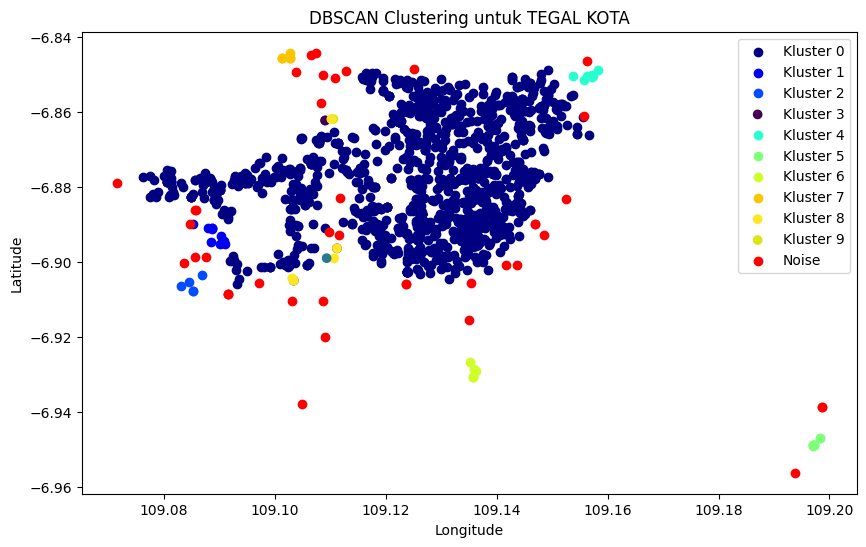

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Ambil data koordinat dari filtered_tegal_kota
coordinates = filtered_tegal_kota[['KOORDINAT_X', 'KOORDINAT_Y']].values

# Melakukan DBSCAN
db = DBSCAN(eps=0.003, min_samples=4).fit(coordinates)  # eps dan min_samples bisa disesuaikan

# Menambahkan label kluster ke DataFrame
filtered_tegal_kota['cluster'] = db.labels_

# Tampilkan jumlah kluster yang ditemukan (-1 berarti noise)
print(f"Jumlah kluster: {len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)}")
print(f"Jumlah noise: {np.sum(db.labels_ == -1)}")

# Visualisasikan hasil clustering
plt.figure(figsize=(10, 6))

# Plot setiap kluster dengan warna berbeda
for cluster_label in set(db.labels_):
    cluster_points = coordinates[db.labels_ == cluster_label]
    color = 'red' if cluster_label == -1 else plt.cm.jet(float(cluster_label) / max(db.labels_ + 1))  # Noise berwarna merah
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], c=color, label=f"Kluster {cluster_label}" if cluster_label != -1 else "Noise")

plt.title('DBSCAN Clustering untuk TEGAL KOTA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best')
plt.show()


## PYMOO NSGA II

In [ ]:
# @title Load Data
import pandas as pd
import numpy as np
from random import shuffle, choice
from joblib import dump, load
import os
from tqdm import tqdm
from math import radians, cos, sin, asin, sqrt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load customer data dengan separator koma dan melewati baris yang bermasalah
data = pd.read_csv('/content/drive/My Drive/tesis/tegalkota_data_update_nosubrute_som_23102024_2.csv', sep=';', on_bad_lines='skip')

# Mengecek apakah kolom sudah terhapus
print(data.tail())
print(data.shape)


Mounted at /content/drive
        No         IDPEL  KOORDINAT_X  KOORDINAT_Y   kwh  UNITUP  nomor rute  \
1250  1250  522511579078    -6.890119   109.102603   545   52251        64.0   
1251  1251  522511579124    -6.885874   109.103589  1220   52251        34.0   
1252  1252  522511589250    -6.872225   109.101293   977   52251         4.0   
1253  1253  522511617401    -6.881382   109.081522   822   52251        52.0   
1254  1254  522541496515    -6.901975   109.125668   632   52251        47.0   

      urutan  
1250     7.0  
1251     9.0  
1252     0.0  
1253     5.0  
1254    11.0  
(1255, 8)


In [ ]:

#@title cluster awal
import pandas as pd


# Menghitung nomor rute yang unik, jumlah anggotanya, dan total dendanya (kwh)
result = data.groupby("nomor rute").agg(
    jumlah_anggota=("nomor rute", "size"),
    total_denda=("kwh", "sum")
).reset_index()

# Memfilter hasil untuk jumlah anggota < 15
filtered_result = result[result["jumlah_anggota"] < 15]

# Menampilkan hasil
print("UNSTATISFYING ROUTE")
print(filtered_result)
print("Statisfying route")
print(result)

# Menghitung total cluster, pelanggan, dan kwh
total_clusters = result["nomor rute"].nunique()
total_customers = result["jumlah_anggota"].sum()
total_kwh = result["total_denda"].sum()

summary = {
    "Total Clusters": total_clusters,
    "Total Customers": total_customers,
    "Total kWh": total_kwh
}

summary


UNSTATISFYING ROUTE
   nomor rute  jumlah_anggota  total_denda
0         0.0               1            0
Statisfying route
    nomor rute  jumlah_anggota  total_denda
0          0.0               1            0
1          1.0              18         7340
2          2.0              17         7643
3          3.0              18         7901
4          4.0              18        17340
..         ...             ...          ...
66        66.0              18        26671
67        67.0              18        19787
68        68.0              18        19459
69        69.0              18        15828
70        70.0              18        13130

[71 rows x 3 columns]


{'Total Clusters': 71, 'Total Customers': 1254, 'Total kWh': 1142844}

In [ ]:
#@title remount
# drive.flush_and_unmount()
# drive.mount('/content/drive')

# import os
# from google.colab import drive
# drive.mount('/content/drive')

# folder_path = '/content/drive/My Drive/tesis/'
# files = os.listdir(folder_path)

# for file in files:
#     print(file)


In [ ]:
#@title Praproses
print(data.dtypes)

#ubah tipe data di kolom koordinat
data['KOORDINAT_X'] = pd.to_numeric(data['KOORDINAT_X'], errors='coerce')
data['KOORDINAT_Y'] = pd.to_numeric(data['KOORDINAT_Y'], errors='coerce')

print("\nSetelah perubahan\n", data.dtypes)

No               int64
IDPEL            int64
KOORDINAT_X    float64
KOORDINAT_Y    float64
kwh              int64
UNITUP           int64
nomor rute     float64
urutan         float64
dtype: object

Setelah perubahan
 No               int64
IDPEL            int64
KOORDINAT_X    float64
KOORDINAT_Y    float64
kwh              int64
UNITUP           int64
nomor rute     float64
urutan         float64
dtype: object


In [ ]:
#@title Distance Matrix
import pandas as pd
import numpy as np
import os
from math import radians, cos, sin, asin, sqrt
from joblib import dump, load
from tqdm import tqdm

# Haversine formula to calculate distances between two latitude-longitude points
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers.
    return c * r

# Calculate chunk distances for a part of the coordinate matrix
def calculate_chunk_distance(start_index, chunk_size, coords):
    end_index = min(start_index + chunk_size, coords.shape[0])
    chunk_distances = np.zeros((end_index - start_index, coords.shape[0]))
    for i in range(start_index, end_index):
        for j in range(coords.shape[0]):
            chunk_distances[i - start_index, j] = haversine(coords[i][0], coords[i][1], coords[j][0], coords[j][1])
    return (start_index, chunk_distances)

# Functions to save and load chunks and full matrices
def save_chunk_to_disk(chunk_data, file_path):
    dump(chunk_data, file_path)

def load_chunk_from_disk(file_path):
    return load(file_path)

def save_full_matrix_to_disk(matrix, file_path):
    dump(matrix, file_path)

def load_full_matrix_from_disk(file_path):
    return load(file_path)


# Extract coordinates for calculations
coordinates = data[['KOORDINAT_X', 'KOORDINAT_Y']].to_numpy()


# Define chunk size and directory to store chunks and the full matrix
chunk_size = 1000
chunk_dir = '/content/drive/My Drive/tesis/distance_matrix/chunks'
full_matrix_dir = '/content/drive/My Drive/tesis/distance_matrix'
full_matrix_path = os.path.join(full_matrix_dir, 'tegalkota_data_update_nosubrute_som_23102024_2.joblib')


# Ensure directories exist for saving full matrix and chunks
os.makedirs(full_matrix_dir, exist_ok=True)
os.makedirs(chunk_dir, exist_ok=True)

# Check if the full distance matrix file exists
if os.path.exists(full_matrix_path):
    # Load the full distance matrix from disk
    distance_matrix = load_full_matrix_from_disk(full_matrix_path)
else:
    # Calculate distances in chunks and save to disk with progress bar
    num_chunks = (coordinates.shape[0] + chunk_size - 1) // chunk_size
    for start_index in tqdm(range(0, coordinates.shape[0], chunk_size), total=num_chunks, desc="Calculating distances"):
        chunk_data = calculate_chunk_distance(start_index, chunk_size, coordinates)
        chunk_file_path = os.path.join(chunk_dir, f'chunk_{start_index}.joblib')
        save_chunk_to_disk(chunk_data, chunk_file_path)

    # Load chunks and reconstruct the full distance matrix with progress bar
    distance_matrix = np.zeros((coordinates.shape[0], coordinates.shape[0]))
    for start_index in tqdm(range(0, coordinates.shape[0], chunk_size), total=num_chunks, desc="Reconstructing distance matrix"):
        chunk_file_path = os.path.join(chunk_dir, f'chunk_{start_index}.joblib')
        chunk_data = load_chunk_from_disk(chunk_file_path)
        start_idx, chunk_distances = chunk_data
        end_idx = start_idx + chunk_distances.shape[0]
        distance_matrix[start_idx:end_idx, :] = chunk_distances

    # Save the full distance matrix to disk
    save_full_matrix_to_disk(distance_matrix, full_matrix_path)

# Verify the size and type of distance_matrix
print(f'Distance matrix shape: {distance_matrix.shape}')
print(f'Distance matrix type: {type(distance_matrix)}')

# Example of loading the saved distance matrix later:
loaded_matrix = load_full_matrix_from_disk(full_matrix_path)
print(f'Loaded distance matrix shape: {loaded_matrix.shape}')


Distance matrix shape: (1255, 1255)
Distance matrix type: <class 'numpy.ndarray'>
Loaded distance matrix shape: (1255, 1255)


In [ ]:
distance_matrix

array([[0.        , 2.01138207, 2.24896278, ..., 3.86438824, 6.21246488,
        4.04978447],
       [2.01138207, 0.        , 1.25178825, ..., 3.54567823, 5.46940187,
        2.03855623],
       [2.24896278, 1.25178825, 0.        , ..., 4.77330822, 6.71591022,
        2.5245431 ],
       ...,
       [3.86438824, 3.54567823, 4.77330822, ..., 0.        , 2.40847563,
        4.26424654],
       [6.21246488, 5.46940187, 6.71591022, ..., 2.40847563, 0.        ,
        5.3845579 ],
       [4.04978447, 2.03855623, 2.5245431 , ..., 4.26424654, 5.3845579 ,
        0.        ]])

In [ ]:
# Mengakses jarak dari pelanggan indeks 1 ke pelanggan indeks 0
jarak_1_ke_0 = distance_matrix[0, 276]
print(f"Jarak dari pelanggan dengan indeks 276 ke indeks 0 (depot) adalah: {jarak_1_ke_0} km")

Jarak dari pelanggan dengan indeks 276 ke indeks 0 (depot) adalah: 3.0903984433475893 km


In [ ]:
#@title instal library pymoo
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.0 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=c182c8df63a9145de043d0d6498254dd76c799781d057f0df7f8c565a456861f
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
# Mengambil daftar unique nomor rute dari data
nomor_rute_unique = data['nomor rute'].dropna().unique()

# Membuat cluster_data berdasarkan nomor rute dan mengurutkan berdasarkan kolom 'urutan'
cluster_data = []
for rute in nomor_rute_unique:
    # Filter pelanggan berdasarkan nomor rute dan urutkan berdasarkan kolom 'urutan'
    cluster = data[data['nomor rute'] == rute].sort_values('urutan')['No'].tolist()
    cluster_data.append(cluster)

# Menampilkan hasil
print(f"Total cluster (nomor rute): {len(cluster_data)}")
print(f"Isi/ data pelanggan pada cluster pertama: {cluster_data[0]}")
print(f"Cluster lengkap: {cluster_data}")


Total cluster (nomor rute): 71
Isi/ data pelanggan pada cluster pertama: [0]
Cluster lengkap: [[0], [94, 199, 813, 845, 269, 1145, 665, 1051, 718, 1088, 814, 341, 1, 592, 206, 358, 391, 267], [298, 1036, 386, 368, 365, 589, 235, 751, 1151, 581, 396, 1122, 2, 373, 920, 327, 1041, 448], [901, 378, 60, 483, 98, 159, 405, 201, 443, 779, 264, 316, 3, 1074, 436, 1144, 863, 978], [954, 600, 1164, 1162, 613, 616, 244, 103, 372, 4, 1072, 458, 232, 1139, 652, 568, 317, 330], [5, 782, 654, 843, 461, 166, 1125, 750, 367, 725, 893, 138, 123, 528, 392, 387, 722], [535, 1103, 127, 719, 463, 1204, 1004, 124, 187, 636, 6, 473, 632, 945, 416, 608, 1205, 91], [641, 777, 659, 1147, 867, 7, 58, 550, 575, 377, 489, 507, 57, 376, 523, 344, 729, 526], [902, 990, 681, 705, 8, 635, 1163, 1025, 1194, 85, 440, 896, 544, 1167, 1241, 211, 312, 524], [1212, 1010, 1171, 767, 1009, 119, 49, 170, 388, 9, 18, 629, 606, 15, 985, 811, 988, 721], [1082, 509, 737, 20, 1159, 42, 10, 609, 313, 615, 640, 272, 1229, 1210, 754, 

In [ ]:
#@title Definisikan Parameter Data
import numpy as np
from joblib import load

#membuat array
customer = data[['No', 'IDPEL', 'KOORDINAT_Y', 'KOORDINAT_X', 'kwh', 'UNITUP', 'nomor rute', 'urutan']].values.tolist()

# Mengurutkan list berdasarkan 'nomor rute' dan 'urutan'
customer_sorted = sorted(customer, key=lambda x: (x[6], x[7]))  # Indeks 6 dan 7 sesuai dengan posisi 'nomor rute' dan 'urutan'

# Data kWh dari pelanggan, misal ini merepresentasikan konsumsi kWh pelanggan
customer_kwh = data['kwh'].values

distance_matrix = distance_matrix
customer_kwh = customer_kwh

customer_ids = data['No'].values

# Gabungkan ID pelanggan dan kWh menjadi list of tuples [(id, kwh), ...]
customer_info = list(zip(customer_ids, customer_kwh))

print(len(customer))
print(customer)
print("customer_sorted",customer_sorted)
print(customer_info)


# Dictionary untuk menyimpan koordinat pelanggan berdasarkan 'No' sebagai kunci
data_koordinat = {int(row[0]): (row[3], row[2]) for row in customer}  # row[0] adalah 'No', row[3] adalah 'KOORDINAT_X', dan row[2] adalah 'KOORDINAT_Y'

# Dictionary untuk menyimpan konsumsi kWh pelanggan berdasarkan 'No' sebagai kunci
data_kwh = {int(row[0]): row[4] for row in customer}  # row[4] adalah 'kwh'

print("Data Koordinat Pelanggan:", data_koordinat)
print("Data Konsumsi kWh Pelanggan:", data_kwh)

# Mengambil hanya IDPEL dari list yang sudah diurutkan
customer_sorted_no_only = [customer[0] for customer in customer_sorted]

# Menampilkan list IDPEL
print("customer_sorted_no_only",customer_sorted_no_only)

1255
[[0.0, 522511111111.0, 109.1359, -6.867, 0.0, 52251.0, 0.0, 0.0], [1.0, 522510001621.0, 109.1309721, -6.8844146, 5390.0, 52251.0, 58.0, 12.0], [2.0, 522510002848.0, 109.1421603, -6.886246756, 1386.0, 52251.0, 70.0, 12.0], [3.0, 522510006407.0, 109.1401359, -6.872740833, 370.0, 52251.0, 39.0, 12.0], [4.0, 522510012942.0, 109.1371354, -6.8583958, 951.0, 52251.0, 37.0, 9.0], [5.0, 522510019801.0, 109.1345827, -6.8964304, 2479.0, 52251.0, 7.0, 0.0], [6.0, 522510020754.0, 109.14014, -6.86289, 22.0, 52251.0, 68.0, 10.0], [7.0, 522510023871.0, 109.1408467, -6.870423333, 394.0, 52251.0, 22.0, 5.0], [8.0, 522510029428.0, 109.1381677, -6.8728967, 268.0, 52251.0, 66.0, 4.0], [9.0, 522510033805.0, 109.1402346, -6.8582283, 858.0, 52251.0, 51.0, 9.0], [10.0, 522510042055.0, 109.1387316, -6.863916369, 1883.0, 52251.0, 62.0, 6.0], [11.0, 522510045747.0, 109.1348614, -6.8677671, 7160.0, 52251.0, 65.0, 11.0], [12.0, 522510047696.0, 109.135926, -6.8874532, 143.0, 52251.0, 15.0, 4.0], [13.0, 52251005

In [ ]:
#@title Mapping id/no to index
customer_id_to_index = {cust[0]: i for i, cust in enumerate(customer)}
customer_id_to_index

{0.0: 0,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 4,
 5.0: 5,
 6.0: 6,
 7.0: 7,
 8.0: 8,
 9.0: 9,
 10.0: 10,
 11.0: 11,
 12.0: 12,
 13.0: 13,
 14.0: 14,
 15.0: 15,
 16.0: 16,
 17.0: 17,
 18.0: 18,
 19.0: 19,
 20.0: 20,
 21.0: 21,
 22.0: 22,
 23.0: 23,
 24.0: 24,
 25.0: 25,
 26.0: 26,
 27.0: 27,
 28.0: 28,
 29.0: 29,
 30.0: 30,
 31.0: 31,
 32.0: 32,
 33.0: 33,
 34.0: 34,
 35.0: 35,
 36.0: 36,
 37.0: 37,
 38.0: 38,
 39.0: 39,
 40.0: 40,
 41.0: 41,
 42.0: 42,
 43.0: 43,
 44.0: 44,
 45.0: 45,
 46.0: 46,
 47.0: 47,
 48.0: 48,
 49.0: 49,
 50.0: 50,
 51.0: 51,
 52.0: 52,
 53.0: 53,
 54.0: 54,
 55.0: 55,
 56.0: 56,
 57.0: 57,
 58.0: 58,
 59.0: 59,
 60.0: 60,
 61.0: 61,
 62.0: 62,
 63.0: 63,
 64.0: 64,
 65.0: 65,
 66.0: 66,
 67.0: 67,
 68.0: 68,
 69.0: 69,
 70.0: 70,
 71.0: 71,
 72.0: 72,
 73.0: 73,
 74.0: 74,
 75.0: 75,
 76.0: 76,
 77.0: 77,
 78.0: 78,
 79.0: 79,
 80.0: 80,
 81.0: 81,
 82.0: 82,
 83.0: 83,
 84.0: 84,
 85.0: 85,
 86.0: 86,
 87.0: 87,
 88.0: 88,
 89.0: 89,
 90.0: 90,
 91.0: 91,
 92.0: 9

In [ ]:
#@title SETTING PARAMETER NSGA II

# Setting Pramater
min_customer_in_route = 15 # jumlah inspeksi minimal per rute (pelanggan)
inspection_duration = 15  # lama inspeksi per pelanggan (menit)
uncertain_time_delay = 10 # waktu tambahan yang diakibatkan oleh faktor-faktor tak terduga seperti kemacetan, kondisi jalan yang buruk, atau interaksi dengan pelanggan yang tidak kooperatif, dll
vehicle_speed = 40 / 60  # kecepatan kendaraan dalam km per menit
working_hours = 7.5 * 60   # jam kerja kendaraan per hari
work_days = 20 # Hari Kerja ubah ini run ulang MultiObjectiveInspectionRoutingProblem dan customcrossover
n_vehicles = 2

customer= customer
customer_kwh = customer_kwh
customer_no_to_index = {cust[0]: i for i, cust in enumerate(customer)}
distance_matrix = distance_matrix

cluster_vehicle_map = {
    52251: [0, 1],  # Cluster 52251 memiliki kendaraan 0 dan 1
}

# # Tentukan parameter
fixed_length = n_vehicles * work_days * 50  # ubah 50 maka ubah juga di (ubah di padding, di problem, di crossover)

chunk_size = 10  # Tentukan ukuran chunk

### FUNGSI

In [ ]:
#@title hitung jumlah pelanggan di solusi (X)

"""
 dipake di
  - MultiObjectiveInspectionRoutingProblem()

"""
def hitung_jumlah_pelanggan(solusi):
    """Hitung total pelanggan di seluruh hari dan kendaraan dalam satu solusi."""
    total_pelanggan = 0
    for kendaraan in solusi:  # Iterasi setiap kendaraan
        for hari in kendaraan:  # Iterasi setiap hari dalam kendaraan
            total_pelanggan += len(hari)  # Hitung pelanggan dalam hari
    return total_pelanggan

# Contoh penggunaan


# Contoh struktur data solusi bertingkat
list_solusi = [
    [
        [
            [109.0, 322.0, 583.0, 595.0],  # Hari 1 Kendaraan 1
            [75.0, 432.0, 167.0]           # Hari 2 Kendaraan 1
        ],
        [
            [1239.0, 1242.0, 456.0],       # Hari 1 Kendaraan 2
            [342.0, 265.0]                 # Hari 2 Kendaraan 2
        ]
    ],
    [
        [
            [556.0, 861.0],                # Hari 1 Kendaraan 1
            [430.0, 24.0, 229.0]           # Hari 2 Kendaraan 1
        ],
        [
            [231.0, 479.0, 46.0],          # Hari 1 Kendaraan 2
            [109.0, 322.0, 583.0]          # Hari 2 Kendaraan 2
        ]
    ]
]

# list_solusi = [[[709, 491, 745, 339, 205, 593, 310, 164, 346, 13, 457, 277, 26, 137, 110, 260, 1085, 730], [878, 274, 999, 713, 1089, 95, 710, 1087, 305, 1019, 426, 410, 356, 553, 915, 1050, 828, 798]], [[33, 549, 969, 558, 1199, 1007, 233, 289, 226, 1034, 960, 873, 728, 1143, 1042, 991, 930, 1131], [954, 600, 1164, 1162, 613, 616, 244, 103, 372, 4, 1072, 458, 232, 1139, 652, 568, 317, 330]]]


# Hitung jumlah pelanggan dari semua solusi
jumlah_pelanggan = hitung_jumlah_pelanggan(list_solusi)
print("Jumlah pelanggan dari semua solusi:", jumlah_pelanggan)


Jumlah pelanggan dari semua solusi: 8


In [ ]:
#@title Fungsi calculate_total_distance_and_time

# Fungsi untuk menghitung waktu tempuh antar customer berdasarkan jarak dan kecepatan
def calculate_travel_time(distance, speed):
    return distance / speed  # Menghasilkan waktu dalam menit

# Fungsi untuk menghitung total jarak dan total waktu dalam satu sub-rute
def calculate_total_distance_and_time(route, distance_matrix, vehicle_speed, inspection_duration, uncertain_time_delay, depot):
    total_distance = 0
    total_time = 0
    total_inspection_and_delay_time  = 0
    total_time_travel = 0
    for i in range(1, len(route)):  # Mulai dari 1 karena 0 adalah depot
        # Konversi nomor pelanggan ke indeks menggunakan mapping
        index_prev_customer = customer_id_to_index.get(route[i - 1])
        index_current_customer = customer_id_to_index.get(route[i])

        if index_prev_customer is not None and index_current_customer is not None:
            # print(index_prev_customer, index_current_customer)
            distance = distance_matrix[index_prev_customer, index_current_customer]
            # print("jarak", distance)
            travel_time = calculate_travel_time(distance, vehicle_speed)
            total_time_travel = total_time_travel + travel_time

            total_distance += distance
            total_time += travel_time + inspection_duration + uncertain_time_delay
            total_waktu_lain = inspection_duration + uncertain_time_delay
            total_inspection_and_delay_time  += total_waktu_lain

        else:
            print(f"Error: Invalid customer number in route. route[i-1]: {route[i-1]}, route[i]: {route[i]}")
    # print("**total_time",total_time)
    # print("**total_inspection_and_delay_time",total_inspection_and_delay_time)
    # print("waktu travel", travel_time)
    # Tambahkan jarak dari depot ke pelanggan pertama

    # Tambahkan jarak dan waktu dari depot ke pelanggan pertama
    index_first_customer = customer_id_to_index.get(route[0])
    if index_first_customer is not None:
        distance_to_first_customer = distance_matrix[depot, index_first_customer]
        travel_time_to_first_customer = calculate_travel_time(distance_to_first_customer, vehicle_speed)
        total_distance += distance_to_first_customer
        total_time += travel_time_to_first_customer
    else:
        print(f"Error: Invalid customer number for route[0]: {route[0]}")


    # Tambahkan jarak dan waktu perjalanan kembali ke depot
    index_last_customer = customer_id_to_index.get(route[-1])
    if index_last_customer is not None:
        return_to_depot_distance = distance_matrix[index_last_customer, depot]
        return_to_depot_time = calculate_travel_time(return_to_depot_distance, vehicle_speed)
        total_distance += return_to_depot_distance
        total_time += return_to_depot_time
    else:
        print(f"Error: Invalid customer number for return to depot. route[-1]: {route[-1]}")

    return total_distance, total_time


In [ ]:
#@title calculate_total_denda

def calculate_total_denda(route, customer_kwh, customer_id_to_index):
    """Hitung total denda berdasarkan konsumsi kWh pelanggan dalam rute."""

    # Cek apakah customer_id_to_index adalah dictionary
    if not isinstance(customer_id_to_index, dict):
        raise TypeError("customer_id_to_index harus berupa dictionary, bukan list.")

    # Ubah key di customer_id_to_index menjadi integer (jika perlu)
    customer_id_to_index = {int(float(key)): value for key, value in customer_id_to_index.items()}

    total_denda = 0.0

    # Iterasi setiap customer dalam rute dan tambahkan denda kWh mereka
    for customer_id in route:
        if customer_id in customer_id_to_index:
            index = customer_id_to_index[customer_id]
            total_denda += customer_kwh[index]  # Tambahkan denda berdasarkan indeks
        else:
            print(f"Customer ID {customer_id} tidak ditemukan dalam customer_id_to_index.")

    return total_denda


In [ ]:
#@title CEK FITNESS
selected_customers =  [1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415]

jarak, waktu = calculate_total_distance_and_time(selected_customers, distance_matrix, vehicle_speed, inspection_duration, uncertain_time_delay, depot=0)
print(jarak, waktu)

total_denda = calculate_total_denda(selected_customers, customer_kwh, customer_id_to_index)
print(total_denda)
print(len(selected_customers))

10.397890968031769 440.59683645204757
46189.0
18


In [ ]:
# # Mengakses jarak dari pelanggan indeks 1 ke pelanggan indeks 0
# total_jarak = 0
# jarak = distance_matrix[0, 2]
# print(f"Jarak dari pelanggan dengan indeks 276 ke indeks 0 (depot) adalah: {jarak} km")
# total_jarak += jarak
# jarak = distance_matrix[2, 3]
# print(f"Jarak dari pelanggan dengan indeks 276 ke indeks 0 (depot) adalah: {jarak} km")
# total_jarak += jarak
# jarak = distance_matrix[3, 0]
# print(f"Jarak dari pelanggan dengan indeks 276 ke indeks 0 (depot) adalah: {jarak} km")
# total_jarak += jarak

# print(total_jarak)

In [ ]:
#@title two_opt
import numpy as np

def hitung_biaya_rute(rute, matriks_jarak, pelanggan_ke_index):
    """Menghitung biaya total dari rute yang diberikan."""
    biaya = 0
    for i in range(len(rute) - 1):
        dari_index = pelanggan_ke_index[rute[i]]
        ke_index = pelanggan_ke_index[rute[i + 1]]
        biaya += matriks_jarak[dari_index][ke_index]
    return biaya

def two_opt(rute, matriks_jarak, pelanggan_ke_index):
    """Melakukan optimasi 2-opt dengan depot sementara."""
    # Tambahkan depot (0.0) di awal dan akhir rute untuk keperluan optimasi
    depot = 0.0
    rute_optimasi = [depot] + rute + [depot]  # Tambahkan depot

    rute_terbaik = rute_optimasi
    biaya_terbaik = hitung_biaya_rute(rute_terbaik, matriks_jarak, pelanggan_ke_index)
    perbaikan = True

    while perbaikan:
        perbaikan = False
        # Iterasi hanya pada pelanggan (tanpa depot di indeks 0 dan terakhir)
        for i in range(1, len(rute_terbaik) - 2):
            for j in range(i + 1, len(rute_terbaik) - 1):
                # Buat rute baru dengan membalik segmen antara i dan j
                rute_baru = (
                    rute_terbaik[:i]
                    + rute_terbaik[i:j][::-1]  # Membalik segmen antara i dan j
                    + rute_terbaik[j:]
                )
                biaya_baru = hitung_biaya_rute(rute_baru, matriks_jarak, pelanggan_ke_index)

                # Jika rute baru lebih baik, perbarui rute dan biaya terbaik
                if biaya_baru < biaya_terbaik:
                    rute_terbaik = rute_baru
                    biaya_terbaik = biaya_baru
                    perbaikan = True

    # Hapus depot dari awal dan akhir rute hasil optimasi
    rute_final = rute_terbaik[1:-1]
    return rute_final



In [ ]:
#@title chunk two opt

def chunk_route(route, chunk_size):
    """Membagi rute menjadi beberapa chunk dengan ukuran tertentu."""
    return [route[i:i + chunk_size] for i in range(0, len(route), chunk_size)]

def optimize_chunks(route, chunk_size, distance_matrix, customer_id_to_index):
    """Mengoptimasi setiap chunk rute menggunakan two-opt dan menggabungkannya kembali."""
    # Membagi rute menjadi beberapa chunk
    chunks = chunk_route(route, chunk_size)

    # Optimasi setiap chunk dengan two-opt
    optimized_chunks = [
        two_opt(chunk, distance_matrix, customer_id_to_index) for chunk in chunks
    ]

    # Gabungkan semua chunk menjadi satu rute lengkap
    optimized_route = [item for chunk in optimized_chunks for item in chunk]
    return optimized_route



route = [1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415]
print(f"rute awal {route}")

# Contoh penggunaan
chunk_size = 10  # Tentukan ukuran chunk
optimized_route = optimize_chunks(route, chunk_size, distance_matrix, customer_id_to_index)

print("Rute setelah optimasi dengan chunk:", optimized_route)

# Hitung jarak dan waktu setelah optimasi
jarak, waktu = calculate_total_distance_and_time(optimized_route, distance_matrix, vehicle_speed, inspection_duration, uncertain_time_delay, depot=0)

print("Jarak setelah optimasi =", jarak)
print("Waktu setelah optimasi =", waktu)


print("Awal = ", route)
print("Panjang =",len(route))
jarak_, waktu_ = calculate_total_distance_and_time(route, distance_matrix, vehicle_speed, inspection_duration, uncertain_time_delay, depot=0)
print("jarak awal = ", jarak_)
print("waktu awal = ", waktu_)

opt = two_opt(route, distance_matrix, customer_id_to_index)
print("Optm", opt)
print("Panjang =",len(opt))
jarak, waktu = calculate_total_distance_and_time(opt, distance_matrix, vehicle_speed, inspection_duration, uncertain_time_delay, depot=0)
print("jarak optz = ", jarak)
print("waktu optz= ", waktu)

print("Selisih Waktu =", waktu_-waktu)
print("Selisih Jarak = ", jarak_-jarak)


rute awal [1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415]
Rute setelah optimasi dengan chunk: [1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 545, 1200, 1246, 765, 172, 910, 460, 415]
Jarak setelah optimasi = 10.503762884512664
Waktu setelah optimasi = 440.75564432676896
Awal =  [1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415]
Panjang = 18
jarak awal =  10.397890968031769
waktu awal =  440.59683645204757
Optm [1247, 1232, 121, 1182, 884, 892, 838, 792, 306, 293, 765, 1246, 1200, 545, 460, 172, 910, 415]
Panjang = 18
jarak optz =  10.218941334462333
waktu optz=  440.32841200169344
Selisih Waktu = 0.2684244503541322
Selisih Jarak =  0.17894963356943627


In [ ]:
#@title unflaten unpadding untuk Solusi

# def unflatten_unpadding_solutions2(flattened_solutions, delimiter):
#     """
#     Unflatten the flattened solutions based on the delimiter to separate vehicle routes
#     and remove padding.
#     Jadi [[Kendaraan 1], [Kendaraan 2], ...]
#     """
#     unflattened_solutions = []

#     for solution in flattened_solutions:
#         sub_routes = []
#         current_route = []

#         # Loop setiap customer dalam solusi
#         for customer in solution:
#             if customer == delimiter:  # Jika menemukan delimiter
#                 if current_route:  # Jika ada rute yang sedang dibangun
#                     sub_routes.append(current_route)
#                     current_route = []  # Reset rute
#             else:
#                 current_route.append(customer)  # Tambahkan customer ke rute saat ini

#         # Tambahkan sisa rute terakhir jika ada
#         if current_route:
#             sub_routes.append(current_route)

#         unflattened_solutions.append(sub_routes)

#     return unflattened_solutions

# # ____
# solutions = [
#             [64.0, 78.0, 162.0, 378.0, 455.0, 512.0, 635.0, 743.0, 882.0, 901.0, 966.0, 975.0, 980.0, 1108.0, 1163.0, 1176.0, 1193.0, 1203.0, 150.0, 204.0, 241.0, 296.0, 333.0, 382.0, 393.0, 404.0, 470.0, 646.0, 713.0, 790.0, 906.0, 991.0, 999.0, 1075.0, 1089.0, 1104.0, -1.0, 19.0, 326.0, 329.0, 371.0, 480.0, 481.0, 590.0, 607.0, 652.0, 660.0, 739.0, 753.0, 818.0, 822.0, 823.0, 825.0, 986.0, 1139.0, 179.0, 234.0, 337.0, 611.0, 650.0, 669.0, 830.0, 859.0, 875.0, 880.0, 921.0, 1005.0, 1049.0, 1133.0, 1134.0, 1137.0, 1170.0, 1197.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
#             [901.0, 980.0, 1193.0, 1176.0, 378.0, 455.0, 1108.0, 966.0, 162.0, 512.0, 78.0, 64.0, 975.0, 1203.0, 882.0, 635.0, 1163.0, 646.0, 1104.0, 133.0, 743.0, 668.0, 757.0, 1116.0, 820.0, 693.0, 925.0, 514.0, 1062.0, 478.0, 182.0, 361.0, 517.0, 1232.0, 1223.0, 440.0, -1.0, 1099.0, 1247.0, 1046.0, 1241.0, 211.0, 312.0, 477.0, 296.0, 333.0, 204.0, 382.0, 241.0, 150.0, 713.0, 999.0, 1089.0, 404.0, 393.0, 790.0, 906.0, 1075.0, 470.0, 991.0, 1005.0, 1197.0, 179.0, 1134.0, 1137.0, 880.0, 1170.0, 875.0, 234.0, 669.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
#             [1163.0, 635.0, 1176.0, 455.0, 975.0, 1203.0, 64.0, 512.0, 1116.0, 743.0, 517.0, 1232.0, 1241.0, 1099.0, 1247.0, 1134.0, 179.0, 1137.0, 1170.0, 875.0, 921.0, 830.0, 1131.0, 991.0, 470.0, 1075.0, 906.0, 790.0, 393.0, 287.0, 171.0, 221.0, 821.0, 1132.0, 150.0, -1.0, 241.0, 382.0, 204.0, 1089.0, 999.0, 713.0, 404.0, 333.0, 296.0, 1104.0, 197.0, 947.0, 1166.0, 309.0, 762.0, 448.0, 650.0, 601.0, 203.0, 607.0, 753.0, 825.0, 480.0, 1139.0, 329.0, 326.0, 986.0, 371.0, 481.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
#             [64.0, 78.0, 162.0, 378.0, 455.0, 512.0, 635.0, 743.0, 882.0, 901.0, 966.0, 975.0, 980.0, 1108.0, 1163.0, 1176.0, 1193.0, 1203.0, 150.0, 204.0, 241.0, 296.0, 333.0, 382.0, 393.0, 404.0, 470.0, 646.0, 713.0, 790.0, 906.0, 991.0, 999.0, 1075.0, 1089.0, 1104.0, -1.0, 19.0, 326.0, 329.0, 371.0, 480.0, 481.0, 590.0, 607.0, 652.0, 660.0, 739.0, 753.0, 818.0, 822.0, 823.0, 825.0, 986.0, 1139.0, 179.0, 234.0, 337.0, 611.0, 650.0, 669.0, 830.0, 859.0, 875.0, 880.0, 921.0, 1005.0, 1049.0, 1133.0, 1134.0, 1137.0, 1170.0, 1197.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
#             [1116.0, 668.0, 693.0, 743.0, 361.0, 517.0, 1232.0, 440.0, 211.0, 1241.0, 1099.0, 1247.0, 1134.0, 179.0, 1137.0, 1170.0, 921.0, 875.0, 830.0, 991.0, 470.0, 1075.0, 906.0, 790.0, 393.0, 150.0, 241.0, 382.0, 204.0, 1089.0, 999.0, 713.0, 404.0, 333.0, 296.0, 1104.0, -1.0, 1163.0, 635.0, 378.0, 901.0, 980.0, 1176.0, 1193.0, 1108.0, 966.0, 162.0, 512.0, 78.0, 64.0, 455.0, 975.0, 1203.0, 882.0, 646.0, 650.0, 371.0, 326.0, 329.0, 1139.0, 480.0, 753.0, 825.0, 607.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
#             [309.0, 1166.0, 197.0, 1241.0, 1247.0, 1099.0, 1232.0, 517.0, 1137.0, 1170.0, 875.0, 830.0, 1131.0, 991.0, 470.0, 1075.0, 906.0, 790.0, 393.0, 287.0, 171.0, 221.0, 821.0, 1132.0, 150.0, 241.0, 382.0, 204.0, 713.0, 999.0, 1089.0, 404.0, 333.0, 296.0, 1104.0, -1.0, 1163.0, 635.0, 1116.0, 901.0, 1176.0, 1193.0, 980.0, 378.0, 646.0, 762.0, 882.0, 448.0, 743.0, 455.0, 1203.0, 975.0, 947.0, 64.0, 78.0, 512.0, 162.0, 601.0, 966.0, 1108.0, 611.0, 650.0, 203.0, 481.0, 371.0, 986.0, 660.0, 326.0, 329.0, 1139.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
#             ]

# solution = [
#             [64.0, 78.0, 162.0, 378.0, 455.0, 512.0, 635.0, 743.0, 882.0, 901.0, 966.0, 975.0, 980.0, 1108.0, 1163.0, 1176.0, 1193.0, 1203.0, 150.0, 204.0, 241.0, 296.0, 333.0, 382.0, 393.0, 404.0, 470.0, 646.0, 713.0, 790.0, 906.0, 991.0, 999.0, 1075.0, 1089.0, 1104.0, -1.0, 19.0, 326.0, 329.0, 371.0, 480.0, 481.0, 590.0, 607.0, 652.0, 660.0, 739.0, 753.0, 818.0, 822.0, 823.0, 825.0, 986.0, 1139.0, 179.0, 234.0, 337.0, 611.0, 650.0, 669.0, 830.0, 859.0, 875.0, 880.0, 921.0, 1005.0, 1049.0, 1133.0, 1134.0, 1137.0, 1170.0, 1197.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
#           ]

# decode_solution = unflatten_unpadding_solutions2(solutions, delimiter=-1)
# print(decode_solution)


# # for solution in decode_solution:
# #     print("Solusi :", solution)
# #     print("Jumlah Rute Kendaraan :", len(solution))

# #     total_jarak = 0
# #     total_waktu = 0
# #     total_denda = 0
# #     for rute_kendaraan in solution:
# #         print("Rute Kendaraan :", rute_kendaraan)
# #         jarak, waktu = calculate_total_distance_and_time(rute_kendaraan, distance_matrix, vehicle_speed, inspection_duration, uncertain_time_delay, depot=0)
# #         # print("Jarak = ",jarak,"Waktu =", waktu, "Jumlah Pelanggan", len(rute_kendaraan))
# #         total_jarak += jarak
# #         total_waktu += waktu
# #         denda = calculate_total_denda(rute_kendaraan, customer_kwh, customer_id_to_index)
# #         print("Denda =",denda)
# #         total_denda += denda

# #     print("Total Jarak:", total_jarak)
# #     print("Total Waktu:", total_waktu)
# #     print("Total Denda:", total_denda)


In [ ]:
#@title Membagi pelanggan menjadi sub-rute per hari kerja

def divide_into_sub_routes(customers, distance_matrix, min_customer_in_route,
                           working_hours, inspection_duration,
                           uncertain_time_delay, vehicle_speed, depot=0):
    sub_routes = []  # List untuk menyimpan semua sub-rute
    current_route = []  # Inisialisasi rute saat ini dengan depot
    total_time = 0  # Total waktu dalam rute saat ini
    total_distance = 0  # Total jarak dalam rute saat ini

    for i in range(1, len(customers)):
        next_customer = customers[i]

        # Buat rute sementara untuk menghitung waktu dan jarak
        temp_route = current_route + [next_customer]
        temp_total_distance, temp_total_time = calculate_total_distance_and_time(
            temp_route, distance_matrix, vehicle_speed,
            inspection_duration, uncertain_time_delay, depot
        )

        # print(f"Temp Rute saat ini: {temp_route}, total jarak temp: {temp_total_distance} - total waktu temp: {temp_total_time}, ")
        if temp_total_time <= working_hours:
            # Jika total waktu masih dalam batas, tambahkan pelanggan ke rute
            current_route.append(next_customer)
            total_time = temp_total_time
            total_distance = temp_total_distance
        else:
            # Jika melebihi batas, simpan rute saat ini dan mulai rute baru

            sub_routes.append(current_route)  # Simpan rute saat ini
            # print("FINAL = ",sub_routes)

            # Inisialisasi rute baru dengan pelanggan berikutnya
            current_route = [next_customer]
            total_distance, total_time = calculate_total_distance_and_time(
                current_route, distance_matrix, vehicle_speed,
                inspection_duration, uncertain_time_delay, depot
            )

    # Tambahkan rute terakhir jika belum disimpan
    if len(current_route) > 1:
        sub_routes.append(current_route)

    return sub_routes

In [ ]:
#@title create_sub_routes - decode_child_into_routes

# def create_sub_routes(child, n_vehicles, work_days, min_customer_in_route):
#     """
#     Membagi setiap solusi dalam 'child' menjadi rute berdasarkan jumlah kendaraan dan hari kerja.
#     """
#     from itertools import chain

#     # Hasil akhir menyimpan semua solusi/rute yang didekodekan
#     all_routes = []

#     # Proses setiap solusi dalam 'child'
#     for solution_index, solution in enumerate(child):
#         # print(f"\nMemproses Solusi {solution_index + 1}...")

#         # Gabungkan semua pelanggan untuk solusi ini
#         all_customers = list(chain.from_iterable(solution))
#         # print(f"Total pelanggan dalam solusi {solution_index + 1}: {len(all_customers)}")

#         route_for_solution = []  # Rute untuk solusi ini

#         # Loop untuk setiap kendaraan
#         for vehicle in range(n_vehicles):
#             vehicle_route = []  # Rute untuk kendaraan ini

#             # Loop untuk setiap hari kerja
#             for day in range(work_days):
#                 daily_sub_route = []  # Rute harian untuk hari ini

#                 # print(f"Vehicle {vehicle}, Day {day} mulai dengan {len(all_customers)} pelanggan tersisa.")

#                 # Tambahkan pelanggan ke sub-rute selama waktu memungkinkan
#                 while all_customers:
#                     customer = all_customers.pop(0)  # Ambil pelanggan berikutnya
#                     daily_sub_route.append(customer)

#                     # Hitung jarak dan waktu setelah menambah pelanggan
#                     distance, time = calculate_total_distance_and_time(
#                         daily_sub_route,
#                         distance_matrix,
#                         vehicle_speed,
#                         inspection_duration,
#                         uncertain_time_delay,
#                         depot=0
#                     )

#                     # print(f"distance: {distance}, time: {time}")

#                     # Jika waktu masih dalam batas, lanjutkan, jika tidak, batalkan dan pindah ke hari/kendaraan berikutnya
#                     if time >= working_hours:
#                         all_customers.insert(0, customer)  # Kembalikan pelanggan terakhir ke daftar
#                         daily_sub_route.pop()  # Hapus pelanggan terakhir
#                         break

#                 # print(f"FINAL Sub-route for Vehicle {vehicle}, Day {day}: {daily_sub_route}")
#                 vehicle_route.extend(daily_sub_route)  # Simpan rute harian ke rute kendaraan

#             route_for_solution.append(vehicle_route)  # Simpan rute kendaraan ke rute solusi

#         all_routes.append(route_for_solution)  # Simpan rute solusi ini ke hasil akhir

#     # print("Final Routes:", all_routes)
#     return all_routes


# child = [
#           [[635.0, 1163.0, 743.0, 129.0, 408.0, 153.0, 554.0, 145.0, 521.0, 495.0, 238.0, 496.0, 1182.0, 121.0, 599.0, 717.0, 322.0, 109.0, 983.0, 680.0, 134.0, 1184.0, 810.0, 742.0, 1012.0, 1108.0, 966.0, 162.0, 512.0, 78.0, 64.0, 1203.0, 975.0, 455.0, 1193.0, 1176.0, 980.0, 901.0, 378.0, 882.0, 127.0, 719.0, 1103.0, 492.0, 796.0, 538.0, 1154.0, 731.0, 96.0, 136.0, 342.0, 265.0, 787.0, 275.0, 807.0, 587.0, 579.0, 444.0, 269.0, 845.0, 1127.0, 41.0, 572.0, 266.0, 340.0, 147.0, 1028.0, 834.0]],
#           [[188.0, 743.0, 451.0, 353.0, 348.0, 1230.0, 1140.0, 1232.0, 153.0, 121.0, 496.0, 238.0, 517.0, 749.0, 1179.0, 618.0, 1109.0, 499.0, 1101.0, 1132.0, 750.0, 741.0, 826.0, 1098.0, 962.0, 678.0, 904.0, 100.0, 681.0, 990.0, 902.0, 886.0, 701.0, 957.0, 175.0, 437.0, 203.0, 1127.0, 147.0, 1219.0, 1231.0, 923.0, 1234.0, 1168.0, 1149.0, 1217.0, 1218.0, 1236.0, 622.0, 691.0, 1028.0, 834.0, 1163.0, 635.0, 1103.0, 719.0, 127.0, 1203.0, 599.0, 717.0, 1184.0, 64.0]],
#           [[121.0, 129.0, 136.0, 145.0, 153.0, 238.0, 275.0, 408.0, 444.0, 495.0, 496.0, 521.0, 554.0, 787.0, 807.0, 845.0, 1127.0, 1182.0, 64.0, 78.0, 162.0, 378.0, 455.0, 512.0, 635.0, 743.0, 882.0, 901.0, 966.0, 975.0, 980.0, 1108.0, 1163.0, 1176.0, 1193.0, 1203.0, 188.0, 34.0, 599.0, 1154.0, 731.0, 538.0, 796.0, 717.0, 492.0, 96.0, 322.0, 109.0, 127.0, 719.0, 1103.0, 71.0, 680.0, 983.0, 72.0, 134.0, 1184.0, 742.0, 810.0, 1012.0, 114.0, 451.0, 342.0, 265.0, 353.0, 348.0, 579.0]]
#         ]


# # Contoh penggunaan
# decode_child_into_routes = create_sub_routes(child, n_vehicles=2, work_days=2, min_customer_in_route=15)
# print(decode_child_into_routes)




In [ ]:
#@title fungsi create_sub_routes - assign customer (crossover thp 2)
"""
    Fungsi untuk menempatkan pelanggan di crossover tahap 2
"""

def create_sub_routes(gabungkan, n_vehicles, work_days, min_customer_in_route,
                      working_hours, distance_matrix, vehicle_speed,
                      inspection_duration, uncertain_time_delay, customer_sorted_no_only, depot=0):
    routing = []  # List untuk menyimpan semua rute kendaraan

    # Loop untuk setiap kendaraan
    for vehicle in range(n_vehicles):
        vehicle_routes = []  # List untuk menyimpan rute harian per kendaraan

        # Loop untuk setiap hari kerja
        for day in range(work_days):
            # print(f"Kendaraan {vehicle + 1} Hari ke-{day + 1}")

            current_route = []  # Rute sementara untuk hari ini
            total_time = 0  # Total waktu untuk hari ini
            total_distance = 0  # Total jarak untuk hari ini
            # print("---- GABUNGKAN --- Panjang =",len(gabungkan), "RUTE",gabungkan)
            # Loop sampai batas waktu kerja tercapai atau pelanggan habis
            while total_time <= working_hours:
                # Ambil pelanggan berikutnya dari gabungkan
                # Apabila Gabungkan habis, cari pelanggan dari customer_sorted_id_only yang belum ada di current_route
                if not gabungkan:
                    # print("habis 1")
                    # Gabungkan habis, cari pelanggan dari customer_sorted_id_only yang belum ada di current_route
                    # Mengkonversi current_route ke set untuk operasi penghapusan yang lebih cepat
                    current_route_set = set(current_route)
                    # Menggunakan list comprehension untuk membuat list baru tanpa pelanggan yang sudah ada di current_route
                    gabungkan = [customer for customer in customer_sorted_no_only[1:] if customer not in current_route_set]
                    # print("gabungkan 1", gabungkan)
                    if not gabungkan:  # Jika setelah penyaringan tidak ada lagi pelanggan yang dapat ditambahkan
                        break  # Keluar dari loop karena semua pelanggan sudah dijadwalkan atau diperiksa
                    # Sekarang 'gabungkan' hanya berisi pelanggan yang belum ada di current_route

                    if not gabungkan:  # Periksa lagi setelah isi ulang
                        break
                next_customer = gabungkan.pop(0)

                # Buat rute sementara untuk menghitung waktu dan jarak
                temp_route = current_route + [next_customer]
                # print("temp_route 1 =",temp_route)
                # print("JUMLAH =", len(temp_route))
                temp_total_distance, temp_total_time = calculate_total_distance_and_time(
                    temp_route, distance_matrix, vehicle_speed,
                    inspection_duration, uncertain_time_delay, depot
                )

                # Jika waktu total masih dalam batas, tambahkan pelanggan ke rute
                if temp_total_time <= working_hours:
                    current_route.append(next_customer)
                    total_time = temp_total_time
                    total_distance = temp_total_distance
                else:
                    # Jika melebihi batas waktu, kembalikan pelanggan ke list
                    gabungkan.insert(0, next_customer)
                    # print(f"Pelanggan {next_customer} tidak muat di Kendaraan {vehicle + 1} Hari ke-{day + 1}")
                    break

            # print("sisa =",len(gabungkan))
            # print("###current_route TAHAP 1", current_route)
            # print("###len current_route TAHAP 1", len(current_route))

            #jika panjang sub rute inspeksi < min_customer_in_route
            if len(current_route) < min_customer_in_route:
                if not gabungkan:
                    # print("habis 2")
                    # Gabungkan habis, cari pelanggan dari customer_sorted_id_only yang belum ada di current_route
                    # Mengkonversi current_route ke set untuk operasi penghapusan yang lebih cepat
                    current_route_set = set(current_route)

                    # Menggunakan list comprehension untuk membuat list baru tanpa pelanggan yang sudah ada di current_route
                    gabungkan = [customer for customer in customer_sorted_no_only[1:] if customer not in current_route_set]
                    # print("gabungkan setelah habis", gabungkan)
                    if not gabungkan:  # Jika setelah penyaringan tidak ada lagi pelanggan yang dapat ditambahkan
                        break  # Keluar dari loop karena semua pelanggan sudah dijadwalkan atau diperiksa
                    # Sekarang 'gabungkan' hanya berisi pelanggan yang belum ada di current_route

                # print("SINIDISINI current_route =",current_route)
                # print("**total_time",total_time)
                # print("**GABUNGKAN",gabungkan)

                #optimasi rute dari segi jarak untuk menambah pelanggan
                optimized_current_route = two_opt(current_route, distance_matrix, customer_id_to_index)
                current_route = optimized_current_route

                #hitung waktu setelah di optimasi
                opt_total_distance, opt_total_time = calculate_total_distance_and_time(
                    current_route, distance_matrix, vehicle_speed,
                    inspection_duration, uncertain_time_delay, depot
                )

                # print("optimized_current_route", optimized_current_route)
                # print("opt_total_time",opt_total_time)
                kurang = min_customer_in_route - len(current_route)
                # print("---- kurang",kurang)

                for _ in range(kurang+1):
                    next_customer2 = gabungkan.pop(0)
                    # print("next_customer2",next_customer2)

                    # Buat rute sementara untuk menghitung waktu dan jarak
                    temp_route2 = current_route + [next_customer2]
                    # print("--temp_route",temp_route2)

                    temp_total_distance2, temp_total_time2 = calculate_total_distance_and_time(
                        temp_route2, distance_matrix, vehicle_speed,
                        inspection_duration, uncertain_time_delay, depot
                    )

                    # print("--temp_total_distance2",temp_total_distance2)
                    # print("--temp_total_time2",temp_total_time2)
                    opt_total_time = temp_total_time2
                    opt_total_distance = temp_total_distance2

                    # Jika waktu total masih dalam batas, tambahkan pelanggan ke rute
                    if temp_total_time2 <= working_hours:
                        current_route.append(next_customer2)
                        # print("current_route2 = ",current_route)
                        opt_total_time = temp_total_time2
                        total_distance = temp_total_distance2
                    else:
                        # Jika melebihi batas waktu, kembalikan pelanggan ke list
                        gabungkan.insert(0, next_customer2)
                        # print(f"Pelanggan {next_customer2} tidak muat di Kendaraan {vehicle + 1} Hari ke-{day + 1}")
                        break

            # Simpan rute hari ini ke vehicle_routes jika ada pelanggan
            if current_route:
                vehicle_routes.append(current_route)
                # print(f"Rute Kendaraan {vehicle + 1} Hari ke-{day + 1}: {current_route}")

        # Simpan semua rute kendaraan ke routing
        if vehicle_routes:
            routing.append(vehicle_routes)

    # # Print hasil akhir dan pelanggan yang tidak terlayani
    # print("Hasil akhir routing:", routing)
    # print("Pelanggan yang tidak terlayani:", gabungkan)

    return routing, gabungkan


In [ ]:
# def cari_fitness_terbaik(fitness_per_kendaraan, obj):
#     """Cari rute terbaik berdasarkan kriteria tertentu (obj: 1=distance, 2=denda, 3=jumlah titik)."""
#     best_fitness = None

#     if obj == 1:
#         # Cari rute dengan jarak terpendek
#         best_fitness = min(
#             (harian for kendaraan in fitness_per_kendaraan for harian in kendaraan['fitness_harian']),
#             key=lambda x: x['distance']
#         )
#     elif obj == 2:
#         # Cari rute dengan denda terbesar
#         best_fitness = max(
#             (harian for kendaraan in fitness_per_kendaraan for harian in kendaraan['fitness_harian']),
#             key=lambda x: x['denda']
#         )
#     elif obj == 3:
#         # Cari rute dengan jumlah titik terbanyak
#         best_fitness = max(
#             (harian for kendaraan in fitness_per_kendaraan for harian in kendaraan['fitness_harian']),
#             key=lambda x: x['jumlah_titik']
#         )

#     return best_fitness


In [ ]:
#@title FLATEN

# Data awal
# X_inisiasi = [
#     [
#         [
#             [657.0, 36.0, 949.0, 703.0, 967.0] ,
#             [75.0, 432.0, 167.0, 314.0, 1100.0]
#         ],
#         [
#             [109.0, 322.0, 583.0],
#             [958.0, 303.0, 1090.0, 431.0, 573.0]
#         ]
#     ],
#     [
#         [
#             [577.0, 198.0, 441.0, 300.0, 120.0],
#             [109.0, 322.0, 583.0, 595.0, 717.0]
#         ],
#         [
#             [1252.0, 421.0, 222.0],
#             [535.0, 1103.0, 127.0, 719.0]
#         ]
#     ],
#     [
#         [
#             [841.0, 704.0, 1030.0, 141.0],
#             [484.0, 157.0, 540.0, 569.0, 427.0]
#         ],
#         [
#             [901.0, 378.0, 60.0, 483.0],
#             [611.0, 1017.0, 673.0, 1161.0, 214.0]
#         ]
#     ]
# ]

def flatten(X):
    solusi_flat = []  # List utama untuk menyimpan semua solusi

    for solusi in X:
        flat_list = []  # Reset flat_list untuk setiap solusi baru
        for kendaraan in solusi:
            for hari in kendaraan:
                flat_list.extend(hari)  # Tambahkan elemen hari ke flat list
                flat_list.append(-1)  # Marker akhir hari
            flat_list.append(-2)  # Marker akhir kendaraan
        flat_list.append(-3)  # Marker akhir solusi
        solusi_flat.append(flat_list)  # Simpan setiap solusi dalam list utama

    return solusi_flat



def unflatten(flat_solutions):
    X = []  # List utama untuk semua solusi

    for flat_list in flat_solutions:
        solusi = []  # List untuk kendaraan dalam satu solusi
        kendaraan = []  # List untuk hari dalam satu kendaraan
        hari = []  # List untuk elemen dalam satu hari

        for value in flat_list:
            if value == -1:  # Akhir hari
                kendaraan.append(hari)
                hari = []
            elif value == -2:  # Akhir kendaraan
                solusi.append(kendaraan)
                kendaraan = []
            elif value == -3:  # Akhir solusi (tidak diperlukan di dalam loop ini)
                continue  # Abaikan -3, hanya sebagai marker antar solusi
            else:
                hari.append(value)  # Tambahkan elemen ke hari

        X.append(solusi)  # Tambahkan solusi yang selesai diolah

    return X



# print("X_inisiasi",X_inisiasi)

# # Flattening
# flat_list = flatten(X_inisiasi)
# print("Flattened List:", flat_list)

# # Unflattening
# X_reconstructed = unflatten(flat_list)
# print("Reconstructed Structure:", X_reconstructed)

In [ ]:
#@title Padding

# Fungsi padding untuk setiap solusi
def pad_flat_list(flat_list, fixed_length, padding_value=-1):
    """Fungsi untuk melakukan padding pada flat list agar memiliki panjang tetap."""
    if len(flat_list) < fixed_length:
        # Tambahkan padding sampai mencapai panjang tetap
        flat_list.extend([padding_value] * (fixed_length - len(flat_list)))
    elif len(flat_list) > fixed_length:
        # Potong jika panjang lebih dari fixed_length
        flat_list = flat_list[:fixed_length]
    return flat_list

# Fungsi untuk padding seluruh solusi
def pad_all_solutions(flat_solutions, fixed_length, padding_value=-1):
    """Lakukan padding untuk setiap solusi dalam list of lists."""
    padded_solutions = []
    for flat_list in flat_solutions:
        padded_solutions.append(pad_flat_list(flat_list, fixed_length, padding_value))
    return padded_solutions



# # Flattening data awal
# flat_solutions = flatten(X_inisiasi)
# print("Flat List Sebelum Padding:", flat_solutions)

# # Lakukan padding untuk setiap solusi
# padded_solutions = pad_all_solutions(flat_solutions, fixed_length)
# print("Flat List Setelah Padding:", padded_solutions)

# # Kembalikan ke struktur awal (unflatten)
# X_reconstructed = unflatten(padded_solutions)
# print("Reconstructed Structure:", X_reconstructed)


In [ ]:
#@title unpadding unflatten

def unflatten(flat_solutions):
    X = []  # List untuk menampung semua solusi

    for flat_list in flat_solutions:
        solusi = []  # List untuk kendaraan dalam satu solusi
        kendaraan = []  # List untuk hari dalam satu kendaraan
        hari = []  # List untuk elemen dalam satu hari

        for value in flat_list:
            if value == -1:  # Akhir hari
                kendaraan.append(hari)  # Tambahkan hari ke kendaraan
                hari = []  # Reset list hari
            elif value == -2:  # Akhir kendaraan
                solusi.append(kendaraan)  # Tambahkan kendaraan ke solusi
                kendaraan = []  # Reset list kendaraan
            elif value == -3:  # Akhir solusi (abaikan di dalam loop ini)
                continue
            elif value != -1:  # Tambahkan nilai ke hari jika bukan marker
                hari.append(value)

        # Tambahkan solusi yang sudah selesai diproses
        X.append(solusi)

    return X




def unflatten_from_numpy(flat_solution):
    """Fungsi untuk mengembalikan struktur bertingkat dari solusi yang di-flatten."""
    solusi = []
    kendaraan = []
    hari = []

    for value in flat_solution:
        if value == -1:  # Akhir hari
            kendaraan.append(hari)
            hari = []
        elif value == -2:  # Akhir kendaraan
            solusi.append(kendaraan)
            kendaraan = []
        elif value == -3:  # Akhir solusi (tidak perlu diubah)
            continue
        else:
            hari.append(int(value))  # Konversi float ke integer

    return solusi



### NSGA

In [ ]:
#@title MultiObjectiveInspectionRoutingProblem

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.sampling import Sampling
from random import sample
import numpy as np
from pymoo.core.problem import Problem

class MultiObjectiveInspectionRoutingProblem(Problem):

    def __init__(self, distance_matrix, customer_kwh, customer, min_customers_per_route, vehicle_speed, working_hours, inspection_duration,
                 n_vehicles, work_days, uncertain_time_delay, fixed_length, customer_sorted_no_only):
        self.distance_matrix = distance_matrix
        self.customer_kwh = customer_kwh
        self.customer = customer
        self.n_vehicles = n_vehicles
        self.work_days = work_days
        self.uncertain_time_delay = uncertain_time_delay
        self.n_customers = fixed_length  # ubah nilai ini maka jangan lupa ubah pad_all_solutions; Perkiraan panjang individu maksimal n hari kerja = n_var disini 1 rute per hari per kendaraan maksimal 30 pelanggan
                                                        # (ubah di padding, di problem, di crossover)
        self.vehicle_speed = vehicle_speed
        self.working_hours = working_hours
        self.inspection_duration = inspection_duration
        self.min_customers_per_route = min_customers_per_route  # Batasan minimal pelanggan
        self.customer_id_to_index = customer_id_to_index
        self.customer_sorted_no_only = customer_sorted_no_only


        # Definisikan jumlah variabel (jumlah pelanggan), 3 tujuan, dan 2 constraint
        super().__init__(n_var=self.n_customers, n_obj=3, n_constr=2, xl=0, xu=1)

    def _evaluate(self, X, out, *args, **kwargs):
        # print("X di fungsi MultiObjectiveInspectionRoutingProblem", X)
        n_pop = X.shape[0]  # Jumlah Solusi/ Individu yang dibentuk = pop_size

        # Inisialisasi tujuan dan constraints
        f1 = np.zeros(n_pop)  # total jarak (min)
        f2 = np.zeros(n_pop)  # total pendapatan denda (max, berdasarkan kWh)
        f3 = np.zeros(n_pop)  # panjang rute/ jumlah titik yang diperiksa (max)
        g1 = np.zeros(n_pop)  # constraint untuk minimal pelanggan
        g2 = np.zeros(n_pop)  # constraint untuk jam kerja maksimal


        for i in range(n_pop):
            solusi = unflatten_from_numpy(X[i])
            # print(f"Solusi ke-{i + 1}: {solusi}")  # terdiri dari rute 2 kendaraan

            # Pastikan jumlah pelanggan dihitung dengan benar
            jumlah_pelanggan = hitung_jumlah_pelanggan(solusi) #hitung pake fungsi
            # print(f"Jumlah pelanggan untuk solusi ke-{i + 1}: {jumlah_pelanggan}")

            # Hitung total jarak berdasarkan matriks jarak

            total_distance = 0
            total_time = 0
            total_denda = 0
            total_inspeksi = 0 #hitung manual
            waktu_maks_per_hari_per_kendaraan = []  # Lacak waktu maksimal untuk setiap kendaraan untuk constraint jam kerja
            inspeksi_minimal_per_hari_per_kendaraan = []
            if jumlah_pelanggan > 0:
                for rute_kendaraan in solusi:
                    # print(f"Rute Kendaraan = {rute_kendaraan}")
                    total_distance_vehicle = 0
                    total_time_vehicle = 0
                    total_denda_vehicle = 0
                    total_inspeksi_vehicle = 0
                    for rute_harian_kendaraan in rute_kendaraan:
                        distance, time = calculate_total_distance_and_time(rute_harian_kendaraan, self.distance_matrix, self.vehicle_speed, self.inspection_duration, self.uncertain_time_delay, depot=0)
                        total_distance_vehicle += distance
                        total_time_vehicle += time
                        denda = calculate_total_denda(rute_harian_kendaraan, self.customer_kwh, self.customer_id_to_index)
                        total_denda_vehicle += denda
                        total_inspeksi_vehicle += len(rute_harian_kendaraan)

                        # print(f"per hari per kendaraan: rute {rute_harian_kendaraan} - Total Jarak : {distance}, Total time: {time}, Total denda: {denda}, Jumlah titik: {len(rute_harian_kendaraan)}")

                        waktu_maks_per_hari_per_kendaraan.append(time)  # Tambahkan total waktu untuk setiap kendaraan per hari
                        inspeksi_minimal_per_hari_per_kendaraan.append(len(rute_harian_kendaraan))


                    # print(f"Total distance per kendaraan: {total_distance_vehicle}, Total time: {total_time_vehicle}, Total denda: {total_denda_vehicle}, Jumlah titik: {total_inspeksi_vehicle}")
                    total_distance += total_distance_vehicle
                    total_time += total_time_vehicle
                    total_inspeksi += total_inspeksi_vehicle
                    total_denda += total_denda_vehicle
                # print(f"Total distance: {total_distance}, Total time: {total_time}, Total denda: {total_denda}, Jumlah titik : {jumlah_pelanggan}")
            # print("waktu_maks_per_hari_per_kendaraan",waktu_maks_per_hari_per_kendaraan)
            # print("inspeksi_minimal_per_hari_per_kendaraan",inspeksi_minimal_per_hari_per_kendaraan)
            f1[i] = total_distance  # Minimalkan jarak
            f2[i] = -total_denda  # Maksimalkan denda (gunakan negatif untuk minimisasi)
            f3[i] = -total_inspeksi  # Maksimalkan jumlah titik yang diperiksa (gunakan negatif untuk minimisasi)

            # Constraints
            # Untuk g1
            min_inspeksi = min(inspeksi_minimal_per_hari_per_kendaraan) if inspeksi_minimal_per_hari_per_kendaraan else 0
            g1[i] = self.min_customers_per_route - min_inspeksi
            g1[i] = max(g1[i], 0)  # Pastikan tidak negatif

            # Untuk g2
            g2[i] = max([(t - self.working_hours) for t in waktu_maks_per_hari_per_kendaraan]) if waktu_maks_per_hari_per_kendaraan else 0
            g2[i] = max(g2[i], 0)  # Pastikan tidak negatif

        # Hasilkan nilai tujuan dan constraints
        out["F"] = np.column_stack([f1, f2, f3])
        out["G"] = np.column_stack([g1, g2])  # Constraint G harus negatif atau 0 jika valid

        """
        f1,f2,f3 menyimpan nilai objektif dari individu
        """



# Inisialisasi masalah dengan constraint minimal 15 pelanggan
problem = MultiObjectiveInspectionRoutingProblem(distance_matrix=distance_matrix,
                                                 customer_kwh=customer_kwh,
                                                 customer=customer,
                                                 customer_sorted_no_only=customer_sorted_no_only,
                                                 min_customers_per_route=min_customer_in_route,
                                                 vehicle_speed=vehicle_speed,
                                                 working_hours=working_hours,
                                                 inspection_duration=inspection_duration,
                                                 n_vehicles=n_vehicles,
                                                 work_days=work_days,
                                                 uncertain_time_delay=uncertain_time_delay,
                                                 fixed_length=fixed_length)


In [ ]:
#@title Pembuatan Individu/ Solusi Awal


customer_id_to_index = {cust[0]: i for i, cust in enumerate(customer)}

class CustomRouteSampling(Sampling):
    def __init__(self, customer, min_customers_per_route, working_hours, vehicle_speed, inspection_duration, workdays, uncertain_time_delay, n_vehicles):
        self.customer = customer
        self.min_customers_per_route = min_customers_per_route
        self.working_hours = working_hours
        self.vehicle_speed = vehicle_speed
        self.inspection_duration = inspection_duration
        self.workdays = workdays
        self.uncertain_time_delay = uncertain_time_delay
        self.n_vehicles = n_vehicles
        self.vtype = np.float64  # Menggunakan float karena ID pelanggan disimpan dalam bentuk float
        self.repair = None  # Adding this line to fix the AttributeError

        # Ubah array menjadi DataFrame
        self.customer_df = pd.DataFrame(customer, columns=['No', 'IDPEL', 'KOORDINAT_X', 'KOORDINAT_Y', 'kwh', 'UNITUP', 'nomor rute', 'urutan'])

        # Menghitung dan menyimpan nomor rute. Nomor rute dibentuk rute dengan SOM, Mendapatkan nomor rute unik tanpa depot (nomor rute 0)
        self.unique_nomor_rute = [
            rute for rute in self.customer_df['nomor rute'].dropna().unique().tolist() if rute != 0
        ]

        # Debugging: Lihat nomor rute yang telah difilter
        # print(f"Nomor rute unik tanpa depot: {self.unique_nomor_rute}")


    def _do(self, problem, n_samples, **kwargs):

        X = []
        nomorrute_selected = []
        available_routes = self.unique_nomor_rute.copy()  # Salinan dari daftar nomor rute yang tersedia
        inspection_route = []
        vehicle_inspection_route = []
        vehicle_day_inspection_route = []
        selected_nomor_rute_in_population = []

        for i in range(n_samples):
            #print("Pembentukan Individu ", i+1)
            available_routes = self.unique_nomor_rute.copy() # reset avalilabele route jadi penuh lagi setiap ganti individu

            for vehicle in range(self.n_vehicles):
                vehicle_day_inspection_route = []  # Reset untuk setiap kendaraan

                for day in range(self.workdays):
                    #print("Pembentukan Rute Kendaraan ",vehicle+1 , " sampai hari ke", day+1)
                    selected_nomor_rute = np.random.choice(available_routes)
                    selected_nomor_rute_in_population.append(selected_nomor_rute)
                    available_routes.remove(selected_nomor_rute)  # Hapus nomor rute yang sudah dipilih dari daftar
                    # print("Nomor rute yang dipilih secara acak:", selected_nomor_rute)
                    nomorrute_selected.append(selected_nomor_rute)
                    # print(nomorrute_selected)

                    selected_customers = (
                                          self.customer_df[self.customer_df['nomor rute'] == selected_nomor_rute]
                                          .sort_values('urutan')['No']  # Urutkan berdasarkan kolom 'urutan'
                                          .tolist()
                                      )

                    inspection_route.append(selected_customers)  # Simpan pelanggan yang terkait dengan nomor rute
                    # print("Pelanggan yang diperiksa:", inspection_route)

                vehicle_day_inspection_route.append(inspection_route)
                #print(f"vehicle_day_inspection_route untuk kendaraan {vehicle+1} = {vehicle_day_inspection_route} ")
                inspection_route = [] #reset

                vehicle_inspection_route.extend(vehicle_day_inspection_route)  # Tambahkan rute inspeksi kendaraan ke hasil individu
                #print(f"Individu {i+1} = {vehicle_inspection_route} ")

            # Cek apakah vehicle_inspection_route sudah ada di X
            if vehicle_inspection_route not in X:
                X.append(vehicle_inspection_route)  # Tambahkan rute inspeksi kendaraan ke hasil populasi jika belum ada

            vehicle_inspection_route = []  # Reset untuk setiap individu

        print("Rute yang terpilih", selected_nomor_rute_in_population)
        rute_belum_terpilih = set(self.unique_nomor_rute) - set(selected_nomor_rute_in_population)

        print("Rute belum terpilih",rute_belum_terpilih)
        print("X inisiasi = ", X)
        print("len(X)insiasi = ", len(X))

        #flatten
        flat_list = flatten(X)
        # print("Flattened List:", flat_list)

        # Lakukan padding
        padded_solutions = pad_all_solutions(flat_list, fixed_length) # setting nilai fixed_length ada di fungsinya
        print("padded_solutions",padded_solutions)

        return np.array(padded_solutions, dtype=np.int64)


#### Custom Crossover

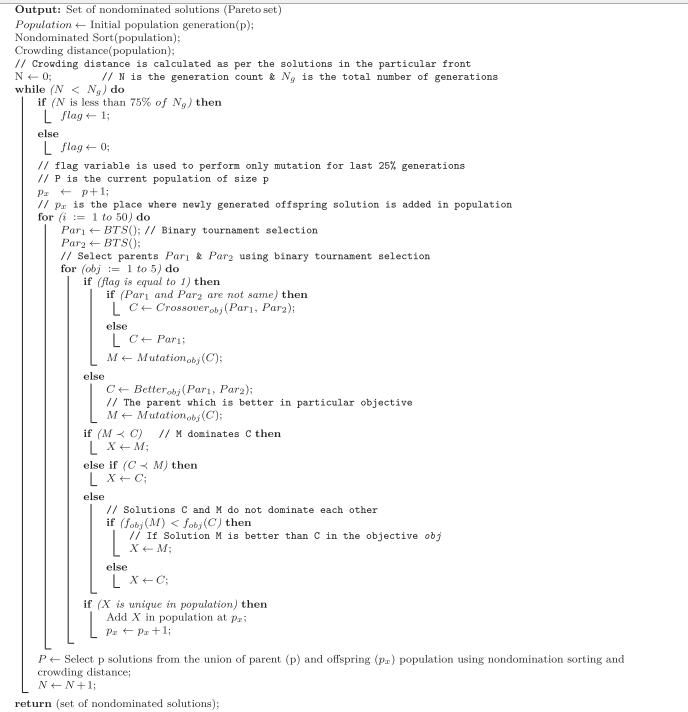

Custom Crossover Srivastava
1. The frst phase starts with an empty solution and iteratively constructs the child solution.
- In each iteration, it chooses one of the parent randomly and finds the most promising feasible route in this parent.
- The most promising route is copied to child solution and number of routes in child is incremented by one.
- This route is deleted from the parent from which it was taken. In case of other parent, the customers belonging to the most promising route is deleted from their respective routes, by connecting the predecessor of each such customer to its successor  updating the various quantities associated the affected routes accordingly.
- The process is repeated k times


2. The second phase inserts the unassigned customers into best position in an iterative manner, and, a complete child solution is created.


In [ ]:
#@title CustomCrossoverWithConstraintHandling2

from pymoo.core.crossover import Crossover
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
import random

class CustomCrossoverWithConstraintHandling2(Crossover):
    def __init__(self, n_gen):
        super().__init__(n_parents=2, n_offsprings=3)  # 2 parent menghasilkan 3 offspring
        self.N_g = n_gen  # N_g = jumlah total generasi
        self.N = 0  # Inisialisasi N sebagai counter untuk jumlah generasi saat ini
        self.distance_matrix = distance_matrix
        self.customer_kwh = customer_kwh
        self.customer = customer
        self.n_vehicles = n_vehicles
        self.work_days = work_days
        self.uncertain_time_delay = uncertain_time_delay
        self.n_customers = fixed_length  # Perkiraan panjang individu maksimal n hari kerja (ubah di padding, di problem, di crossover)
        self.vehicle_speed = vehicle_speed
        self.working_hours = working_hours
        self.inspection_duration = inspection_duration
        self.min_customer_in_route = min_customer_in_route  # Batasan minimal pelanggan
        self.customer_id_to_index = customer_id_to_index
        self.customer_ids = data['No'].values  # No
        self.customer_kwh = data['kwh'].values  # Konsumsi kWh
        self.customer_sorted_no_only = customer_sorted_no_only

        # Gabungkan ID pelanggan dan kWh menjadi list of tuples [(id, kwh), ...]
        self.customer_info = list(zip(self.customer_ids, self.customer_kwh))

        # Urutkan pelanggan berdasarkan kWh dari terbesar ke terkecil
        self.sorted_customers = sorted(self.customer_info, key=lambda x: x[1], reverse=True)

    def _do(self, problem, X, **kwargs):

        """
        X berisi pasangan orang tua (parents) yang dipilih untuk crossover.
          pop_size = 100 --> shape X (2, 48, 100)
          pop_size = 50 --> shape X (2, 23, 100)
          pop_size = 4 --> Shape of X (parents): (2, 2, 100)
            2 = individu (pasangan parents)
            Angka kedua (48 atau 23) menunjukkan berapa banyak pasangan orang tua yang dipilih dari populasi untuk crossover.
            100 = panjang urutan pelanggan di solusi/ individu --> setting di fixed_length = n_vehicles*work_days*25

        Dalam algoritma NSGA-II, seluruh individu dalam populasi akan melalui proses seleksi, termasuk untuk dipilih sebagai parent (orang tua) untuk menghasilkan offspring (keturunan) melalui proses crossover.

        """

        n_matings = X.shape[1]  # Jumlah pasangan parent
        # print("n_matings", n_matings)
        n_var = problem.n_var  # Jumlah variabel dalam solusi

        # Buat array kosong untuk offspring dengan bentuk (3 offspring per mating)
        children = np.zeros((3, n_matings, n_var))

        for i in range(n_matings):
            # print("-- n mating ke = --",i)
            # Ambil 2 parent per mating
            parent1, parent2 = self.domination_tournament_selection(problem, X)

            # Buat 3 offspring dari pasangan parent
            child = []
            for obj in range(1, 4):  # range(1, 4) berarti obj akan bernilai 1, 2, 3
                child_obj = self.custom_crossover(parent1, parent2, obj)
                child.append(child_obj)
                # print("**************** child_obj",obj," = " ,child_obj)

            # print("Jumlah Offspring",len(child))
            # print("child =",child)
            flat_child = flatten(child)
            padded_child = pad_all_solutions(flat_child, fixed_length) # setting nilai fixed_length ada di fungsinya
            # print("padded_solutions",padded_child)


            # Simpan 3 offspring
            try:
                children[0, i, :] = padded_child[0]
                children[1, i, :] = padded_child[1]
                children[2, i, :] = padded_child[2]
            except IndexError as e:
                print(f"Error saat menyimpan offspring: {e}")
                print(f"padded_child shape: {padded_child.shape}, children shape: {children.shape}")
                break  # Hentikan loop jika terjadi error



        return children

    def custom_crossover(self, parent1, parent2, obj):
        # Fase 1: Pembangunan rute dari parent1
        # print("<-------------- FASE SATU ------------------>")
        child_fase_1 = self.build_route(parent1, parent2, obj)

        """
        build route akan menghasilkan 1 calon anak saja
        child_fase_1 berisi struktur = child, copy_decode_parent1, copy_decode_parent2
        """

        # Fase 2: Penyisipan pelanggan yang belum dimasukkan
        child_phase_2 = self.insert_unassigned_customers(child_fase_1, obj)
        # print("child_phase_2",child_phase_2)

        return child_phase_2


    def insert_unassigned_customers(self, child_fase_1, obj):
        # print("<-------------- FASE DUA ------------------>")

        # Pisahkan child dan parent
        calon_child = child_fase_1[0]
        parent1, parent2 = child_fase_1[1], child_fase_1[2]

        # Gabungkan semua pelanggan dari parent1 dan parent2
        all_customers = set()

        # Loop melalui semua kendaraan dan sub-route di kedua parent untuk menambahkan pelanggan ke dalam set
        for parent in [parent1, parent2]:
            for kendaraan in parent:
                for sub_route in kendaraan:
                    all_customers.update(sub_route)  # Tambahkan semua pelanggan tanpa duplikat

        # Konversi kembali ke list jika dibutuhkan
        all_customers = list(all_customers)

        # print("Semua pelanggan unik:", all_customers)

        assigned_customers = calon_child[0]
        unassigned_customers = all_customers
        # print("assigned_customers", assigned_customers)
        # print("unassigned_customers", unassigned_customers)

        # Hitung waktu kerja maksimum
        working_hours_in_amonth_all_team = self.n_vehicles * self.work_days * self.working_hours
        # print("working_hours_in_amonth_all_team",working_hours_in_amonth_all_team)

        # Hitung total waktu awal dari rute
        total_time = sum(
            calculate_total_distance_and_time(
                rute, self.distance_matrix, self.vehicle_speed,
                self.inspection_duration, self.uncertain_time_delay, depot=0)[1]
            for rute in calon_child

        )

        if obj == 1:
            # print("Objektif 1 - Jarak Terpendek")

            # Optimasi dengan Two-Opt pada pelanggan yang belum terassign
            # unassigned_customers_opt = two_opt(unassigned_customers, self.distance_matrix, self.customer_id_to_index)

            unassigned_customers_opt= optimize_chunks(unassigned_customers, chunk_size, self.distance_matrix, self.customer_id_to_index)
            # print("Hasil Two-Opt unassigned_customers_opt:", unassigned_customers_opt)

            # Optimasi dengan Two-Opt untuk rute yang sudah terbentuk
            assigned_customers_opt = two_opt(calon_child[0], self.distance_matrix, self.customer_id_to_index)
            # print("Hasil Two-Opt assigned_customers_opt:", assigned_customers_opt)

            # Menggabungkan assigned_customers_opt dan unassigned_customers_opt
            gabungkan_jarak = assigned_customers_opt + unassigned_customers_opt
            # print("Gabungan List:", gabungkan_jarak)

            # Panggil fungsi create_sub_routes untuk membagi rute berdasarkan kendaraan dan hari kerja
            routing_jarak, sisa_jarak = create_sub_routes(
                gabungkan_jarak, self.n_vehicles, self.work_days, self.min_customer_in_route,
                self.working_hours, self.distance_matrix, self.vehicle_speed,
                self.inspection_duration, self.uncertain_time_delay, self.customer_sorted_no_only, depot=0)

            # Print hasil akhir routing dan pelanggan yang tidak terlayani
            # print("Hasil akhir routing OBJEKTIF 1 :", routing_jarak)
            # print("Pelanggan yang tidak terlayani:", sisa)

            calon_child = routing_jarak

        elif obj == 2:

            # print("objektif 2 - denda terbesar")
            # Ambil daftar pelanggan yang belum ter-assign dan sorting ulang berdasarkan kWh
            unassigned_customers_info = [
                (cust_id, self.customer_kwh[self.customer_id_to_index[cust_id]])
                for cust_id in unassigned_customers
            ]

            # Urutkan pelanggan dari kWh terbesar ke terkecil
            sorted_unassigned_customers = sorted(unassigned_customers_info, key=lambda x: x[1], reverse=True)

            # print("Unassigned customers sorted by kWh:", sorted_unassigned_customers)

            # Hanya ambil ID pelanggan dari sorted_unassigned_customers
            unassigned_customer_ids = [cust[0] for cust in sorted_unassigned_customers]

            # Gabungkan assigned customers dengan unassigned customers yang sudah di-sort
            gabungan_kwh = assigned_customers + unassigned_customer_ids

            # print("Gabungan kwh = ", gabungan_kwh)

            # Panggil fungsi create_sub_routes untuk membagi rute berdasarkan kendaraan dan hari kerja
            routing_kwh, sisa_kwh = create_sub_routes(
                gabungan_kwh, self.n_vehicles, self.work_days, self.min_customer_in_route,
                self.working_hours, self.distance_matrix, self.vehicle_speed,
                self.inspection_duration, self.uncertain_time_delay, self.customer_sorted_no_only, depot=0
            )

            # Print hasil akhir routing dan pelanggan yang tidak terlayani
            # print("Hasil akhir routing:", routing_kwh)
            # print("Pelanggan yang tidak terlayani:", sisa_kwh)

            calon_child = routing_kwh

        elif obj == 3:
            # print("objektif 3 - jumlah pelanggan banyak")

            # Urutkan pelanggan yang belum ter-assign berdasarkan jarak terdekat dari depot
            unassigned_customers_info = [
                (cust_id, self.distance_matrix[self.customer_id_to_index[0]][self.customer_id_to_index[cust_id]])
                for cust_id in unassigned_customers
            ]
            sorted_unassigned_customers = sorted(unassigned_customers_info, key=lambda x: x[1])

            # Ekstrak ID pelanggan setelah sorting
            unassigned_customers_sorted = [customer[0] for customer in sorted_unassigned_customers]
            # print("Unassigned customers sorted by distance:", unassigned_customers_sorted)

            # Gabungkan assigned customers dengan unassigned customers yang sudah di-sort
            gabungan_jumlah = assigned_customers + unassigned_customers_sorted

            # print("Gabungan_jumlah = ", gabungan_jumlah)

            # Panggil fungsi create_sub_routes untuk membagi rute berdasarkan kendaraan dan hari kerja
            routing_jumlah, sisa_jumlah = create_sub_routes(
                gabungan_jumlah, self.n_vehicles, self.work_days, self.min_customer_in_route,
                self.working_hours, self.distance_matrix, self.vehicle_speed,
                self.inspection_duration, self.uncertain_time_delay, self.customer_sorted_no_only, depot=0
            )

            # Print hasil akhir routing dan pelanggan yang tidak terlayani
            # print("Hasil akhir routing:", routing_jumlah)
            # print("Pelanggan yang tidak terlayani:", sisa_jumlah)

            calon_child = routing_jumlah

        return calon_child



    def build_route(self, parent1, parent2, obj):
        """
        Fase 1: Bangun rute dari parent1 sambil memastikan rute tidak melebihi constraint.
        Jika rute melanggar constraint, rute tersebut dihapus.
        """
        # Debugging: Cek apakah parent None
        if parent1 is None or parent2 is None:
            print(f"Parent1: {parent1}, Parent2: {parent2}")
            raise ValueError("Salah satu parent adalah None.")


        child = []
        unassigned_customers = []

        decode_parent1 = unflatten_from_numpy(parent1)
        decode_parent2 = unflatten_from_numpy(parent2)

        # print("decode parent 1 =", decode_parent1)
        # print("decode parent 2 =", decode_parent2)

        copy_decode_parent1 = decode_parent1.copy()
        copy_decode_parent2 = decode_parent2.copy()

        import random
        """
        Pilih salah satu secara acak antara decode_parent1 atau decode_parent2
        parent tadi = X = solusi
        [[solusi 1], [solusi 2], ...[solusi n]]
        solusi 1 = [[rute kendaraan 1], [rute kendaraan 2], ... , [rute kendaraan n]]
        rute kendaraan 1 = [[rute hari 1], [rute hari 2], ... [rute hari n]]

        """

        decode_chosen_parent = random.choice([decode_parent1, decode_parent2])
        # print("Rute acak terpilih decode_chosen_parent:", decode_chosen_parent)

        fitness_per_kendaraan = []  # List untuk menyimpan nilai fitness setiap kendaraan

        for idx_kendaraan, rute_per_kendaraan in enumerate(decode_chosen_parent):
            fitness_harian = []  # List untuk menyimpan nilai fitness setiap hari

            for idx_hari, rute_kendaraan_per_hari in enumerate(rute_per_kendaraan):
                # print(f"\nRute kendaraan {idx_kendaraan+1} hari ke {idx_hari + 1}: {rute_kendaraan_per_hari}")

                # Lakukan evaluasi atau hitung fitness untuk setiap rute kendaraan
                f_distance, f_time = calculate_total_distance_and_time(
                                        rute_kendaraan_per_hari,
                                        self.distance_matrix,
                                        self.vehicle_speed,
                                        self.inspection_duration,
                                        self.uncertain_time_delay,
                                        depot=0)

                f_jumlah_titik = len(rute_kendaraan_per_hari)
                f_denda = calculate_total_denda(rute_kendaraan_per_hari, customer_kwh, customer_id_to_index)


                # Simpan hasil fitness per hari dalam dictionary
                fitness_harian.append({
                    'hari': idx_hari + 1,
                    'rute': rute_kendaraan_per_hari,
                    'distance': f_distance,
                    'time': f_time,
                    'jumlah_titik': f_jumlah_titik,
                    'denda': f_denda
                })

                # Simpan hasil fitness untuk kendaraan ini
                fitness_per_kendaraan.append({
                    'kendaraan': idx_kendaraan + 1,
                    'fitness_harian': fitness_harian  # List hasil per hari
                })

                # print(f"Evaluasi Rute kendaraan {idx_kendaraan + 1}, Hari {idx_hari+1} : f_distance = {f_distance}, f_denda = {f_denda}, jumlah titik = {f_jumlah_titik}")


        if obj == 1:
            # Cari rute dengan jarak terpendek
            best_fitness = min(
                (harian for kendaraan in fitness_per_kendaraan for harian in kendaraan['fitness_harian']),
                key=lambda x: x['distance']
            )
        elif obj == 2:
            # Cari rute dengan denda terbesar
            best_fitness = max(
                (harian for kendaraan in fitness_per_kendaraan for harian in kendaraan['fitness_harian']),
                key=lambda x: x['denda']
            )
        elif obj == 3:
            # Cari rute dengan jumlah titik terbanyak
            best_fitness = max(
                (harian for kendaraan in fitness_per_kendaraan for harian in kendaraan['fitness_harian']),
                key=lambda x: x['jumlah_titik']
            )

        # Simpan promising route
        promising_route = best_fitness['rute']
        # print(f"Objektif {obj}, Promising Route: {promising_route}")

        # Menyimpan rute terbaik ke dalam child
        child = [promising_route.copy()]  # Salin rute agar child tidak terpengaruh
        # print(f"Setelah dapet promising route, Child saat ini: {child}")

        # Cek di mana rute terbaik berada dan hapus dari parent asal
        if any(promising_route in kendaraan for kendaraan in copy_decode_parent1):
            # print("Rute terbaik ditemukan di Parent1.")

            # Hapus rute terbaik dari Parent1
            for kendaraan in copy_decode_parent1:
                if promising_route in kendaraan:
                    kendaraan.remove(promising_route)
                    # print(f"Rute {promising_route} telah dihapus dari Parent1.")
                    break

            # Hapus pelanggan dari Parent2
            for pelanggan in promising_route:
                for kendaraan in copy_decode_parent2:
                    for sub_route in kendaraan[:]:  # Salin list untuk menghindari masalah iterasi
                        while pelanggan in sub_route:  # Pastikan semua instance pelanggan dihapus
                            sub_route.remove(pelanggan)
                            # print(f"Pelanggan {pelanggan} dihapus dari Parent2.")

                        # Hapus sub-route jika kosong
                        if not sub_route:
                            kendaraan.remove(sub_route)
                            # print("Sub-route kosong dihapus dari Parent2.")

        else:
            # print("Rute terbaik ditemukan di Parent2.")

            # Hapus rute terbaik dari Parent2
            for kendaraan in copy_decode_parent2:
                if promising_route in kendaraan:
                    kendaraan.remove(promising_route)
                    # print(f"Rute {promising_route} telah dihapus dari Parent2.")
                    break

            # Hapus pelanggan dari Parent1
            for pelanggan in promising_route:
                for kendaraan in copy_decode_parent1:
                    for sub_route in kendaraan[:]:  # Salin list untuk menghindari masalah iterasi
                        while pelanggan in sub_route:  # Pastikan semua instance pelanggan dihapus
                            sub_route.remove(pelanggan)
                            # print(f"Pelanggan {pelanggan} dihapus dari Parent1.")

                        # Hapus sub-route jika kosong
                        if not sub_route:
                            kendaraan.remove(sub_route)
                            # print("Sub-route kosong dihapus dari Parent1.")


        # print("-------------------------------")
        # print("child", child)
        # print("Sisa rute di copy_parent1:", copy_decode_parent1)
        # print("Sisa rute di copy_parent2:", copy_decode_parent2)
        return child, copy_decode_parent1, copy_decode_parent2



    def unflatten_unpadding_solutions(self, flattened_solutions, delimiter):
        """
        Unflatten the flattened solutions based on the delimiter to separate vehicle routes and remove padding.
        dari
        [1134.0, 179.0, 1137.0, 464.0, 921.0, 669.0, 875.0, 234.0, 1170.0, 1133.0, 880.0, 1049.0, 859.0, 337.0, 830.0, 898.0, 998.0, 758.0, 254.0, 350.0, 498.0, 1177.0, 452.0, 1253.0, 389.0, 236.0, 1129.0, 281.0, 508.0, 515.0, 195.0, 981.0, 142.0, 586.0, 286.0, -1.0, 1152.0, 773.0, 25.0, 243.0, 223.0, 993.0, 781.0, 932.0, 1146.0, 946.0, 744.0, 677.0, 99.0, 720.0, 805.0, 174.0, 492.0, 92.0, 500.0, 48.0, 801.0, 584.0, 419.0, 734.0, 135.0, 856.0, 295.0, 1073.0, 294.0, 968.0, 1038.0, 955.0, 714.0, 1086.0, 956.0, 832.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
        menjadi
        [[1134.0, 179.0, 1137.0, 464.0, 921.0, 669.0, 875.0, 234.0, 1170.0, 1133.0, 880.0, 1049.0, 859.0, 337.0, 830.0, 898.0, 998.0, 758.0, 254.0, 350.0, 498.0, 1177.0, 452.0, 1253.0, 389.0, 236.0, 1129.0, 281.0, 508.0, 515.0, 195.0, 981.0, 142.0, 586.0, 286.0], [1152.0, 773.0, 25.0, 243.0, 223.0, 993.0, 781.0, 932.0, 1146.0, 946.0, 744.0, 677.0, 99.0, 720.0, 805.0, 174.0, 492.0, 92.0, 500.0, 48.0, 801.0, 584.0, 419.0, 734.0, 135.0, 856.0, 295.0, 1073.0, 294.0, 968.0, 1038.0, 955.0, 714.0, 1086.0, 956.0, 832.0]]
        """
        unflattened_solutions = []
        current_solution = []

        for item in flattened_solutions:
            if item == delimiter:
                if current_solution:  # Jika ada solusi yang sedang dibangun, tambahkan ke unflattened_solutions
                    unflattened_solutions.append(current_solution)
                    current_solution = []  # Reset solusi
            else:
                current_solution.append(item)

        # Jika ada sisa solusi setelah loop selesai, tambahkan ke unflattened_solutions
        if current_solution:
            unflattened_solutions.append(current_solution)

        # Hapus padding (-1) di setiap solusi yang ditemukan
        cleaned_solutions = []
        for solution in unflattened_solutions:
            # Hapus semua -1 di akhir solusi
            while len(solution) > 0 and solution[-1] == delimiter:
                solution.pop()
            cleaned_solutions.append(solution)

        return cleaned_solutions



    def domination_tournament_selection(self, problem, X):
        kumpulan_kandidat_parent1 = X[0]
        kumpulan_kandidat_parent2 = X[1]
        # print("-- DALAM domination_tournament_selection --")
        # print("Kandidat Parent 1: ", kumpulan_kandidat_parent1)
        # print("Kandidat Parent 2: ", kumpulan_kandidat_parent2)

        rute_terbaik_parent1 = None
        rute_terbaik_parent2 = None

        # Cari rute terbaik untuk Parent 1
        for i, rute1 in enumerate(kumpulan_kandidat_parent1):
            for j, rute2 in enumerate(kumpulan_kandidat_parent1):
                if self.compare_by_domination(problem, rute1, rute2):
                    rute_terbaik_parent1 = rute1
                elif self.compare_by_domination(problem, rute2, rute1):
                    rute_terbaik_parent1 = rute2

        # Cari rute terbaik untuk Parent 2
        for i, rute1 in enumerate(kumpulan_kandidat_parent2):
            for j, rute2 in enumerate(kumpulan_kandidat_parent2):
                if self.compare_by_domination(problem, rute1, rute2):
                    rute_terbaik_parent2 = rute1
                elif self.compare_by_domination(problem, rute2, rute1):
                    rute_terbaik_parent2 = rute2

        # Fallback jika parent terhapus
        if rute_terbaik_parent1 is None or rute_terbaik_parent2 is None:
            # print("Warning: Parent terhapus. Menggunakan alternatif.")
            if rute_terbaik_parent1 is None:
                rute_terbaik_parent1 = kumpulan_kandidat_parent1[0]
            if rute_terbaik_parent2 is None:
                rute_terbaik_parent2 = kumpulan_kandidat_parent2[0]


        # print("Selected rute from Parent 1: ", rute_terbaik_parent1)
        # print("Selected rute from Parent 2: ", rute_terbaik_parent2)


        return rute_terbaik_parent1, rute_terbaik_parent2


    def compare_by_domination(self, problem, candidate1, candidate2):
        # Evaluasi kedua individu (Pareto Front)
        # print("+++candidate1", candidate1)
        # print("+++candidate2", candidate2)
        fitness1 = problem.evaluate(candidate1, return_values_of=["F"])
        fitness2 = problem.evaluate(candidate2, return_values_of=["F"])

        #print("fitness1", fitness1, " -- fitness2", fitness2)

        # Mengecek siapa yang mendominasi (dalam kasus multi-objektif)
        dominates1 = np.all(fitness1 <= fitness2) and np.any(fitness1 < fitness2)
        dominates2 = np.all(fitness2 <= fitness1) and np.any(fitness2 < fitness1)

        # Kembalikan boolean jika kandidat pertama mendominasi kandidat kedua
        if dominates1:
            return True
        # Kembalikan boolean jika kandidat kedua mendominasi kandidat pertama
        elif dominates2:
            return False
        # Jika tidak ada yang mendominasi, pilih acak
        else:
            return np.random.rand() < 0.5





#### Mutation

In [ ]:
#@title NoMutation (seluruh generasi dimutasi)
import random
from pymoo.core.mutation import Mutation

class NoMutation(Mutation):
    def __init__(self, distance_matrix, customer_id_to_index):
        super().__init__()
        self.distance_matrix = distance_matrix  # Simpan matriks jarak
        self.customer_id_to_index = customer_id_to_index  # Simpan mapping pelanggan ke index

    def _do(self, problem, X, **kwargs):
        # print("Mutasi dijalankan, berikut input X:")
        # print(X)  # Menampilkan input

        mutated_children =[]
        # Loop untuk setiap offspring (child) dalam populasi
        for child in X:
            # Decode child menjadi rute/subroute
            decode_child = unflatten_from_numpy(child)
            # print("decode_child (sebelum mutasi):", decode_child)

            # Pilih salah satu rute secara acak
            random_route = random.choice(decode_child)

            # Pilih salah satu subroute dari rute tersebut secara acak
            subroute_index = random.randint(0, len(random_route) - 1)
            subroute_to_mutate = random_route[subroute_index]
            # print("Subroute sebelum mutasi:", subroute_to_mutate)

            # Lakukan Two-Opt pada subroute yang dipilih
            opt_subroute = two_opt(
                subroute_to_mutate, self.distance_matrix, self.customer_id_to_index
            )

            # Ganti subroute yang lama dengan yang sudah dimutasi
            random_route[subroute_index] = opt_subroute
            # print("Subroute setelah mutasi:", opt_subroute)

            # Tampilkan rute penuh setelah subroute diganti
            # print("decode_child (setelah mutasi):", decode_child)
            mutated_children.append(decode_child)
        # print("mutated_children",mutated_children)

        flat_child_mutated = flatten(mutated_children)
        padded_child = pad_all_solutions(flat_child_mutated, fixed_length)
        # print("----------------")
        # print(np.array(padded_child, dtype=np.int64))

        X = np.array(padded_child, dtype=np.int64)
        return X



In [ ]:
#@title selective mutation last 25% generation
import random
import numpy as np
from pymoo.core.mutation import Mutation

class SelectiveMutation(Mutation):
    def __init__(self, distance_matrix, customer_id_to_index, total_generations, mutation_last_percent=0.25):
        super().__init__()
        self.distance_matrix = distance_matrix  # Matriks jarak
        self.customer_id_to_index = customer_id_to_index  # Mapping pelanggan ke index
        self.total_generations = total_generations  # Total generasi
        self.mutation_last_percent = mutation_last_percent  # Persentase akhir generasi untuk mutasi

    def _do(self, problem, X, algorithm=None, **kwargs):
        """
        Mutasi hanya diterapkan pada 25% generasi terakhir.
        """
        mutated_children = []

        # Hitung batas awal untuk 25% generasi terakhir
        threshold_gen = int(self.total_generations * (1 - self.mutation_last_percent))

        # Periksa apakah generasi saat ini termasuk dalam 25% terakhir
        if algorithm and algorithm.n_gen >= threshold_gen:
            # print(f"Mutasi aktif di generasi {algorithm.n_gen}.")
            # Mutasi semua offspring di generasi ini
            for child in X:
                decode_child = unflatten_from_numpy(child)
                random_route = random.choice(decode_child)
                subroute_index = random.randint(0, len(random_route) - 1)
                subroute_to_mutate = random_route[subroute_index]

                # Lakukan Two-Opt pada subroute yang dipilih
                opt_subroute = two_opt(
                    subroute_to_mutate, self.distance_matrix, self.customer_id_to_index
                )

                # Ganti subroute lama dengan hasil mutasi
                random_route[subroute_index] = opt_subroute
                mutated_children.append(decode_child)
        else:
            # Tidak ada mutasi: tambahkan offspring tanpa perubahan
            # print(f"Tidak ada mutasi di generasi {algorithm.n_gen}.")
            mutated_children = [unflatten_from_numpy(child) for child in X]

        # Flatten dan pad solusi
        flat_child_mutated = flatten(mutated_children)
        padded_child = pad_all_solutions(flat_child_mutated, fixed_length)

        # Kembalikan populasi yang sudah diubah atau tetap sama
        return np.array(padded_child, dtype=np.int64)


In [ ]:
#@title SelectiveMutation2
import random
import numpy as np
from pymoo.core.mutation import Mutation

class SelectiveMutation2(Mutation):
    def __init__(self, distance_matrix, customer_id_to_index, total_generations, mutation_last_percent=0.25):
        super().__init__()
        self.distance_matrix = distance_matrix  # Matriks jarak
        self.customer_id_to_index = customer_id_to_index  # Mapping pelanggan ke index
        self.total_generations = total_generations  # Total generasi
        self.mutation_last_percent = mutation_last_percent  # Persentase akhir generasi untuk mutasi

    def _do(self, problem, X, algorithm=None, **kwargs):
        """
        Mutasi dilakukan pada 25% generasi terakhir.
        Pada generasi terakhir, lakukan two-opt pada setiap sub-rute.
        """
        mutated_children = []

        # Hitung batas awal untuk 25% generasi terakhir
        threshold_gen = int(self.total_generations * (1 - self.mutation_last_percent))

        # Periksa apakah generasi saat ini termasuk dalam 25% terakhir
        if algorithm and algorithm.n_gen >= threshold_gen:
            for child in X:
                decode_child = unflatten_from_numpy(child)
                if algorithm.n_gen == self.total_generations:
                    # Generasi terakhir: lakukan two-opt pada setiap sub-rute
                    for vehicle_route in decode_child:
                        # print("vehicle_route", vehicle_route)
                        for i in range(len(vehicle_route)):
                            subroute_to_mutate = vehicle_route[i]
                            # print("subroute_to_mutate", subroute_to_mutate)
                            opt_subroute = two_opt(
                                subroute_to_mutate, self.distance_matrix, self.customer_id_to_index
                            )
                            vehicle_route[i] = opt_subroute  # Update sub-rute dengan hasil two-opt
                            # print("opt_subroute", opt_subroute)
                            # print("vehicle_route after two-opt", vehicle_route[i])
                else:
                    # Generasi 25% terakhir (bukan generasi terakhir): pilih sub-rute acak
                    for vehicle_route in decode_child:
                        subroute_index = random.randint(0, len(vehicle_route) - 1)
                        subroute_to_mutate = vehicle_route[subroute_index]
                        opt_subroute = two_opt(
                            subroute_to_mutate, self.distance_matrix, self.customer_id_to_index
                        )
                        vehicle_route[subroute_index] = opt_subroute  # Update sub-rute dengan hasil two-opt

                mutated_children.append(decode_child)

        else:
            # Tidak ada mutasi: tambahkan offspring tanpa perubahan
            mutated_children = [unflatten_from_numpy(child) for child in X]

        # Flatten dan pad solusi
        flat_child_mutated = flatten(mutated_children)
        padded_child = pad_all_solutions(flat_child_mutated, fixed_length)

        # Kembalikan populasi yang sudah diubah atau tetap sama
        return np.array(padded_child, dtype=np.int64)


In [ ]:
#@title SELECTIVE 3
import random
import numpy as np
from pymoo.core.mutation import Mutation

class SelectiveMutation3(Mutation):
    def __init__(self, distance_matrix, customer_id_to_index, total_generations, mutation_last_percent=0.25):
        super().__init__()
        self.distance_matrix = distance_matrix  # Matriks jarak
        self.customer_id_to_index = customer_id_to_index  # Mapping pelanggan ke index
        self.total_generations = total_generations  # Total generasi
        self.mutation_last_percent = mutation_last_percent  # Persentase akhir generasi untuk mutasi

    def _do(self, problem, X, algorithm=None, **kwargs):
        """
        Mutasi dilakukan pada setiap generasi.
        Pada generasi terakhir, lakukan two-opt pada setiap sub-rute dan seluruh rute.
        """
        mutated_children = []

        for child in X:
            decode_child = unflatten_from_numpy(child)
            for vehicle_route in decode_child:
                # Lakukan two-opt pada setiap sub-rute di setiap generasi
                for i in range(len(vehicle_route)):
                    subroute_to_mutate = vehicle_route[i]
                    opt_subroute = two_opt(
                        subroute_to_mutate, self.distance_matrix, self.customer_id_to_index
                    )
                    vehicle_route[i] = opt_subroute  # Update sub-rute dengan hasil two-opt

            # Jika generasi terakhir, lakukan two-opt pada seluruh rute (gabungan semua sub-rute)
            if algorithm and algorithm.n_gen == self.total_generations:
                for vehicle_route in decode_child:
                    # Gabungkan seluruh sub-rute menjadi satu rute
                    combined_route = [customer for subroute in vehicle_route for customer in subroute]
                    opt_combined_route = two_opt(
                        combined_route, self.distance_matrix, self.customer_id_to_index
                    )

                    # Bagikan kembali hasilnya ke sub-rute dengan panjang semula
                    split_index = 0
                    for i in range(len(vehicle_route)):
                        subroute_length = len(vehicle_route[i])
                        vehicle_route[i] = opt_combined_route[split_index:split_index + subroute_length]
                        split_index += subroute_length

            mutated_children.append(decode_child)

        # Flatten dan pad solusi
        flat_child_mutated = flatten(mutated_children)
        padded_child = pad_all_solutions(flat_child_mutated, fixed_length)

        # Kembalikan populasi yang sudah diubah atau tetap sama
        return np.array(padded_child, dtype=np.int64)


### RUN NSGA

**n_gen:**
Menunjukkan nomor generasi saat ini. Setiap generasi adalah iterasi dalam algoritma evolusioner, seperti NSGA-II, di mana populasi diperbarui dan dioptimalkan.

**n_eval:**
Menunjukkan jumlah evaluasi fungsi objektif kumulatif yang telah dilakukan hingga saat ini. Setiap kali sebuah solusi diuji atau dievaluasi dalam proses optimasi, fungsi objektif dihitung, dan ini dicatat dalam n_eval.

**n_nds:**
Jumlah solusi non-dominated (solusi di Pareto front) pada generasi tersebut. Semakin besar nilai n_nds, semakin banyak solusi yang tidak dapat didominasi oleh solusi lain, menandakan diversitas Pareto front yang tinggi.

**cv_min dan cv_avg:**

**cv_min:** Nilai constraint violation minimum dalam populasi. Jika nilainya 0, berarti ada solusi yang tidak melanggar constraint sama sekali.
**cv_avg:** Nilai rata-rata pelanggaran constraint di populasi. Nilai 0 berarti seluruh populasi mematuhi constraint yang ditetapkan.


**eps:**
 epsilon-indicator atau epsilon-progress, yang mengukur kemajuan antara dua generasi berturut-turut berdasarkan Pareto front.

Jika nilainya 0, berarti tidak ada peningkatan signifikan antara dua generasi.
Nilai yang lebih tinggi menandakan adanya peningkatan atau pergeseran Pareto front ke solusi yang lebih baik.
indicator:

**ideal**: Menunjukkan bahwa solusi dalam generasi tersebut mendekati kondisi ideal dalam optimasi multi-objektif.
**f**: Menandakan bahwa tidak ada peningkatan yang signifikan dalam generasi tersebut, atau generasi tersebut sedang stagnan.
**Nadir**: solusi jauh dari optimal.

In [ ]:
#@title tes chunnk
# remove duplikat
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.selection.tournament import TournamentSelection
import time

def callback(algorithm):
    # print(f"--- -_gen ke {algorithm.n_gen} ---")
    # print(algorithm.pop.get("X"))  # Debug populasi saat ini
    pass

# Konfigurasi
n_gen = 10  # Jumlah generasi
pop_size = 6  # Ukuran populasi

print("Memulai NSGA-II dengan Custom Crossover...")
start_time = time.time()
# Inisialisasi algoritma NSGA-II dengan Custom Sampling, Crossover, dan Repair
algorithm = NSGA2(
    pop_size= pop_size,  # Ukuran populasi
    sampling=CustomRouteSampling(
        customer = customer,
        min_customers_per_route = min_customer_in_route,
        working_hours = working_hours,
        vehicle_speed = vehicle_speed,
        inspection_duration = inspection_duration,
        uncertain_time_delay = uncertain_time_delay,
        workdays = work_days,
        n_vehicles = n_vehicles
      ),  # Sampling kustom
    crossover=CustomCrossoverWithConstraintHandling2(n_gen=n_gen),  # Crossover kustom dengan constraint handling
    mutation=SelectiveMutation2(distance_matrix, customer_id_to_index, n_gen),
    eliminate_duplicates=True  # Hilangkan solusi duplikat

)


# Jalankan optimasi dan cek
print("Jalankan minimize()...")
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=('n_gen', n_gen),
    seed=None, #biarsama # None = Seed untuk random
    verbose=True,
    callback=callback  # Callback untuk debug
)

# Atur opsi tampilan untuk menghindari notasi ilmiah
np.set_printoptions(suppress=True, precision=0)

# Hitung Waktu
compute_time = time.time() - start_time
print("Waktu", compute_time)


# Output hasil akhir setelah optimasi selesai
print("Solusi optimal:", res.X)
print("Nilai objektif:", res.F)

Memulai NSGA-II dengan Custom Crossover...
Jalankan minimize()...
Rute yang terpilih [23.0, 50.0, 11.0, 32.0, 9.0, 62.0, 41.0, 43.0, 57.0, 21.0, 46.0, 69.0, 53.0, 58.0, 48.0, 29.0, 40.0, 3.0, 27.0, 25.0, 49.0, 38.0, 6.0, 16.0, 22.0, 64.0, 42.0, 59.0, 33.0, 31.0, 70.0, 37.0, 8.0, 2.0, 26.0, 56.0, 34.0, 12.0, 17.0, 36.0, 35.0, 4.0, 45.0, 16.0, 43.0, 63.0, 56.0, 42.0, 28.0, 37.0, 2.0, 58.0, 44.0, 59.0, 68.0, 64.0, 23.0, 29.0, 3.0, 15.0, 36.0, 18.0, 8.0, 69.0, 47.0, 67.0, 31.0, 46.0, 51.0, 34.0, 57.0, 1.0, 14.0, 25.0, 13.0, 41.0, 27.0, 5.0, 62.0, 7.0, 37.0, 62.0, 7.0, 46.0, 44.0, 45.0, 23.0, 26.0, 47.0, 57.0, 13.0, 27.0, 69.0, 24.0, 43.0, 54.0, 33.0, 18.0, 17.0, 34.0, 36.0, 58.0, 10.0, 59.0, 8.0, 5.0, 65.0, 15.0, 64.0, 51.0, 14.0, 55.0, 21.0, 1.0, 11.0, 67.0, 3.0, 30.0, 19.0, 63.0, 32.0, 25.0, 29.0, 7.0, 45.0, 59.0, 70.0, 39.0, 69.0, 2.0, 42.0, 9.0, 33.0, 20.0, 55.0, 63.0, 50.0, 21.0, 24.0, 10.0, 65.0, 19.0, 12.0, 6.0, 5.0, 66.0, 13.0, 58.0, 26.0, 37.0, 14.0, 52.0, 68.0, 1.0, 54.0, 43.0, 4

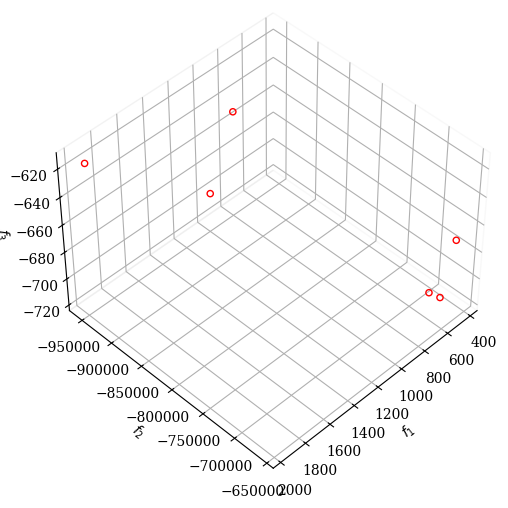

In [ ]:
# Visualisasi Pareto front
plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
#@title eval
import pandas as pd

# Fungsi untuk menghitung total jarak, waktu, denda, dan jumlah pelanggan per hari per kendaraan
def evaluate_routes(routes, distance_matrix, vehicle_speed, inspection_duration,
                    uncertain_time_delay, customer_kwh, customer_id_to_index, depot=0):
    total_jarak = 0
    total_waktu = 0
    total_denda = 0
    total_pelanggan = 0

    # Loop untuk setiap kendaraan
    for rute_kendaraan in routes:
        # Bagi rute menjadi sub-rute harian
        sub_rute_harian = divide_into_sub_routes(
            rute_kendaraan, distance_matrix, min_customer_in_route,
            working_hours, inspection_duration, uncertain_time_delay,
            vehicle_speed, depot
        )

        # Loop untuk setiap sub-rute harian
        for sub_rute in sub_rute_harian:
            jarak, waktu = calculate_total_distance_and_time(
                sub_rute, distance_matrix, vehicle_speed,
                inspection_duration, uncertain_time_delay, depot
            )
            denda = calculate_total_denda(sub_rute, customer_kwh, customer_id_to_index)

            # Akumulasi total
            total_jarak += jarak
            total_waktu += waktu
            total_denda += denda
            total_pelanggan += len(sub_rute)

    return total_jarak, total_waktu, total_denda, total_pelanggan

# Fungsi untuk membuat DataFrame dari hasil evaluasi
def create_evaluation_dataframe(title, solutions, distance_matrix, vehicle_speed,
                                inspection_duration, uncertain_time_delay,
                                customer_kwh, customer_id_to_index):
    data = []

    for i, solution in enumerate(solutions):
        total_jarak, total_waktu, total_denda, total_pelanggan = evaluate_routes(
            solution, distance_matrix, vehicle_speed,
            inspection_duration, uncertain_time_delay,
            customer_kwh, customer_id_to_index
        )

        data.append({
            "Solusi": i + 1,
            "Total Jarak (km)": total_jarak,
            "Total Waktu (menit)": total_waktu,
            "Total Denda (KWH)": total_denda,
            "Jumlah Pelanggan": total_pelanggan
        })

    # Membuat DataFrame dari hasil evaluasi
    df = pd.DataFrame(data)
    return df

X_flatten_padded =[[1238.0, 465.0, 746.0, 747.0, 1119.0, 547.0, 934.0, 158.0, 402.0, 1059.0, 712.0, 315.0, 194.0, 247.0, 62.0, 70.0, 111.0, 186.0, 1058.0, 565.0, 1003.0, 1040.0, 334.0, 1044.0, 81.0, 1115.0, 1102.0, 922.0, 688.0, 118.0, 834.0, 1028.0, 691.0, 622.0, 923.0, -1, 1247.0, 1232.0, 121.0, 1182.0, 884.0, 892.0, 838.0, 792.0, 293.0, 306.0, 765.0, 1200.0, 545.0, 1246.0, 460.0, 910.0, 172.0, 415.0, 94.0, 199.0, 813.0, 845.0, 269.0, 1145.0, 665.0, 1051.0, 718.0, 1088.0, 814.0, 341.0, 1.0, 592.0, 206.0, 358.0, 391.0, 267.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [114.0, 536.0, 288.0, 638.0, 35.0, 144.0, 210.0, 1067.0, 824.0, 116.0, 1110.0, 191.0, 542.0, 1222.0, 943.0, 105.0, 1053.0, 950.0, 484.0, 157.0, 540.0, 569.0, 427.0, 363.0, 212.0, 412.0, 653.0, 660.0, 986.0, 371.0, 481.0, 393.0, 790.0, 906.0, 1075.0, -1, 149.0, 261.0, 486.0, 541.0, 276.0, 855.0, 1057.0, 255.0, 29.0, 242.0, 400.0, 1006.0, 1243.0, 414.0, 919.0, 1166.0, 1105.0, 690.0, 1150.0, 1128.0, 165.0, 196.0, 160.0, 887.0, 185.0, 724.0, 631.0, 188.0, 14.0, 11.0, 612.0, 100.0, 175.0, 886.0, 957.0, 701.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [487.0, 1189.0, 1112.0, 580.0, 1111.0, 445.0, 588.0, 246.0, 678.0, 962.0, 352.0, 273.0, 151.0, 413.0, 776.0, 429.0, 68.0, 853.0, 94.0, 199.0, 813.0, 845.0, 269.0, 1145.0, 665.0, 1051.0, 718.0, 1088.0, 814.0, 341.0, 1.0, 592.0, 206.0, 358.0, 391.0, 267.0, -1, 115.0, 552.0, 578.0, 836.0, 874.0, 221.0, 821.0, 308.0, 97.0, 1180.0, 1060.0, 407.0, 217.0, 280.0, 446.0, 282.0, 366.0, 497.0, 882.0, 1203.0, 975.0, 455.0, 78.0, 64.0, 1175.0, 1012.0, 810.0, 742.0, 1108.0, 162.0, 966.0, 1184.0, 512.0, 134.0, 680.0, 983.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [657.0, 36.0, 949.0, 703.0, 967.0, 770.0, 466.0, 716.0, 304.0, 469.0, 803.0, 131.0, 80.0, 585.0, 79.0, 1221.0, 1124.0, 357.0, 954.0, 600.0, 1164.0, 1162.0, 613.0, 616.0, 244.0, 103.0, 372.0, 4.0, 1072.0, 458.0, 232.0, 1139.0, 652.0, 568.0, 317.0, 330.0, -1, 535.0, 1103.0, 127.0, 719.0, 463.0, 1204.0, 1004.0, 124.0, 187.0, 636.0, 6.0, 473.0, 632.0, 945.0, 416.0, 608.0, 1205.0, 91.0, 709.0, 491.0, 745.0, 339.0, 205.0, 593.0, 310.0, 164.0, 346.0, 13.0, 457.0, 277.0, 26.0, 137.0, 110.0, 260.0, 1085.0, 730.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [182.0, 361.0, 517.0, 597.0, 493.0, 868.0, 1211.0, 759.0, 1237.0, 899.0, 1179.0, 1235.0, 749.0, 672.0, 651.0, 647.0, 639.0, 802.0, 1239.0, 1242.0, 456.0, 560.0, 444.0, 670.0, 666.0, 394.0, 723.0, 936.0, 82.0, 812.0, 1020.0, 707.0, 128.0, 965.0, 1013.0, 256.0, -1, 841.0, 704.0, 1030.0, 141.0, 56.0, 284.0, 857.0, 1225.0, 106.0, 989.0, 1068.0, 881.0, 169.0, 102.0, 252.0, 833.0, 380.0, 63.0, 882.0, 1203.0, 975.0, 455.0, 78.0, 64.0, 1175.0, 1012.0, 810.0, 742.0, 1108.0, 162.0, 966.0, 1184.0, 512.0, 134.0, 680.0, 983.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [1152.0, 773.0, 25.0, 243.0, 223.0, 993.0, 781.0, 932.0, 1146.0, 946.0, 744.0, 677.0, 99.0, 720.0, 805.0, 174.0, 492.0, 92.0, 938.0, 84.0, 1148.0, 849.0, 1207.0, 563.0, 840.0, 161.0, 1220.0, 1097.0, 897.0, 582.0, 1240.0, 381.0, 683.0, 642.0, 93.0, 591.0, -1, 621.0, 1031.0, 735.0, 1084.0, 929.0, 209.0, 1186.0, 532.0, 397.0, 504.0, 1141.0, 39.0, 320.0, 1027.0, 590.0, 184.0, 837.0, 1239.0, 1242.0, 456.0, 560.0, 444.0, 670.0, 666.0, 394.0, 723.0, 936.0, 82.0, 812.0, 1020.0, 707.0, 128.0, 965.0, 1013.0, 256.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0.0, 318.0, 809.0, 66.0, 404.0, 785.0, 756.0, 879.0, 1123.0, 1015.0, 454.0, 1109.0, 618.0, 926.0, 839.0, 1227.0, 1043.0, 1195.0, 61.0, -1, 1252.0, 421.0, 222.0, 698.0, 557.0, 959.0, 89.0, 1107.0, 1106.0, 1233.0, 789.0, 73.0, 715.0, 331.0, 826.0, 1098.0, 726.0, 996.0, 709.0, 491.0, 745.0, 339.0, 205.0, 593.0, 310.0, 164.0, 346.0, 13.0, 457.0, 277.0, 26.0, 137.0, 110.0, 260.0, 1085.0, 730.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [786.0, 112.0, 30.0, 1208.0, 1209.0, 197.0, 1155.0, 40.0, 1249.0, 909.0, 23.0, 627.0, 769.0, 34.0, 927.0, 815.0, 108.0, 437.0, 1011.0, 1197.0, 1005.0, 462.0, 819.0, 262.0, 328.0, 474.0, 1135.0, 904.0, 649.0, 1196.0, 1081.0, 1008.0, 1156.0, 939.0, 891.0, 1169.0, -1, 88.0, 538.0, 796.0, 1154.0, 731.0, 527.0, 634.0, 485.0, 67.0, 1251.0, 382.0, 241.0, 150.0, 1190.0, 973.0, 1061.0, 1046.0, 1099.0, 829.0, 438.0, 1039.0, 964.0, 844.0, 77.0, 1018.0, 763.0, 1029.0, 738.0, 516.0, 65.0, 562.0, 851.0, 1198.0, 154.0, 1052.0, 31.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0.0, 1134.0, 179.0, 1137.0, 464.0, 921.0, 669.0, 875.0, 234.0, 1170.0, 1133.0, 880.0, 1049.0, 859.0, 337.0, 830.0, 898.0, 998.0, 758.0, -1, 1117.0, 22.0, 1201.0, 605.0, 1158.0, 43.0, 87.0, 963.0, 418.0, 417.0, 227.0, 995.0, 835.0, 1047.0, 783.0, 168.0, 604.0, 1244.0, 230.0, 113.0, 925.0, 208.0, 514.0, 190.0, 869.0, 449.0, 1062.0, 1213.0, 72.0, 71.0, 519.0, 171.0, 971.0, 970.0, 817.0, 76.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [75.0, 432.0, 167.0, 314.0, 1100.0, 531.0, 599.0, 45.0, 610.0, 699.0, 748.0, 263.0, 1054.0, 626.0, 1064.0, 942.0, 218.0, 181.0, 500.0, 48.0, 801.0, 584.0, 419.0, 734.0, 135.0, 856.0, 295.0, 1073.0, 294.0, 968.0, 1038.0, 955.0, 714.0, 1086.0, 956.0, 832.0, -1, 88.0, 538.0, 796.0, 1154.0, 731.0, 527.0, 634.0, 485.0, 67.0, 1251.0, 382.0, 241.0, 150.0, 1190.0, 973.0, 1061.0, 1046.0, 1099.0, 958.0, 303.0, 1090.0, 431.0, 573.0, 325.0, 676.0, 559.0, 177.0, 1032.0, 506.0, 74.0, 741.0, 848.0, 935.0, 290.0, 411.0, 251.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]


# Decode solusi optimal dan individu awal
solusi_optimal = unflatten_unpadding_solutions2(res.X.tolist(), delimiter=-1)
individu_awal = unflatten_unpadding_solutions2(X_flatten_padded, delimiter=-1)

# Evaluasi Solusi Optimal
df_solusi_optimal = create_evaluation_dataframe(
    "Solusi Optimal", solusi_optimal, distance_matrix, vehicle_speed,
    inspection_duration, uncertain_time_delay, customer_kwh, customer_id_to_index
)

# Evaluasi Individu Awal
df_individu_awal = create_evaluation_dataframe(
    "Individu Awal", individu_awal, distance_matrix, vehicle_speed,
    inspection_duration, uncertain_time_delay, customer_kwh, customer_id_to_index
)

# Tampilkan DataFrame di Colab
print("\nIndividu Awal")
display(df_individu_awal)

print("Solusi Optimal")
display(df_solusi_optimal)



Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for return to depot. route[-1]: -3
Error: Invalid customer number for route[0]: -3
Error: Invalid customer number for retur

Solusi  Total Jarak (km)  Total Waktu (menit)  Total Denda (KWH)  \
0       1         58.259282          1712.388923            88353.0   
1       2         56.503518          1709.755276            66236.0   
2       3         41.137969          1711.706953            52262.0   
3       4         45.058314          1717.587471            69289.0   
4       5         39.697263          1709.545894            45907.0   
5       6         58.044136          1712.066204            57579.0   
6       7         39.673960          1309.510940            45371.0   
7       8         50.447281          1725.670921            76671.0   
8       9         37.065201          1305.597802            36556.0   
9      10         49.215314          1723.822971            72515.0   

   Jumlah Pelanggan  
0                69  
1                69  
2                70  
3                70  
4                70  
5                69  
6                53  
7                70  
8                53  
9                70

Solusi Optimal


Solusi  Total Jarak (km)  Total Waktu (menit)  Total Denda (KWH)  \
0        1         19.321744          1653.982616            69033.0   
1        2         20.112437          1655.168656            81214.0   
2        3         19.558441          1654.337662            73005.0   
3        4         21.841401          1657.762102           116235.0   
4        5         34.511143          1676.766715           167107.0   
5        6         46.539083          1694.808624           229029.0   
6        7         45.652793          1693.479189           225739.0   
7        8         36.821509          1680.232263           192079.0   
8        9         29.394495          1669.091742           149587.0   
9       10         48.506079          1697.759118           241562.0   
10      11         33.762097          1675.643146           161689.0   
11      12         29.640254          1669.460381           164265.0   
12      13         49.554257          1699.331385           252282.0   
13      14         40.051232          1685.076848           211229.0   
14      15         28.087205          1667.130808           151106.0   
15      16         41.870174          1687.805261           222365.0   
16      17         51.784587          1677.676881           258721.0   
17      18         52.401112          1678.601668           254623.0   
18      19         24.922008          1662.383013           135269.0   
19      20         23.380581          1660.070872           136411.0   
20      21         59.861366          1689.792048           273542.0   
21      22         56.734743          1610.102115           266526.0   
22      23         46.398633          1694.597949           223960.0   
23      24         45.166145          1692.749217           225640.0   
24      25         46.562550          1694.843825           233116.0   
25      26         27.294650          1665.941974           143673.0   
26      27         23.083423          1659.625134           122021.0   
27      28         32.359790          1673.539685           162333.0   
28      29         23.278066          1659.917099           121927.0   
29      30         34.511211          1676.766816           192939.0   
30      31         39.205217          1683.807825           203117.0   
31      32         20.340722          1655.511083           100813.0   

    Jumlah Pelanggan  
0                 69  
1                 69  
2                 69  
3                 69  
4                 69  
5                 69  
6                 69  
7                 69  
8                 69  
9                 69  
10                69  
11                69  
12                69  
13                69  
14                69  
15                69  
16                68  
17                68  
18                69  
19                69  
20                68  
21                65  
22                69  
23                69  
24                69  
25                69  
26                69  
27                69  
28                69  
29                69  
30                69  
31                69

In [ ]:
#@title front 1 solution
# Ambil solusi dengan rank 0 (front 1)
front_1_indices = [i for i, rank in enumerate(res.F) if res.opt.get("rank")[i] == 0]

# Ambil solusi optimal yang ada di front 1
front_1_solutions = [res.X[i] for i in front_1_indices]
print(front_1_solutions)

[array([ 768,  668,  693,  130,  546,  643,  430,   24,  229,   32,  692,
        614,  122,   21, 1026, 1136,  852,  406,   -1,  612,   11,   14,
        188,  631,  724,  185,  762,  914,  976, 1245,  889, 1037,  775,
        488,  924,  645,  351,   -1,   -2,  258,  155,  459,  882, 1176,
        980, 1193,  455,  975, 1203,   64,   78,  512,  162,  966,  983,
        680,  134,   -1, 1184, 1012,  810, 1108,  742, 1175,  963,  418,
        417,  995,  227, 1047,  783,   43,   87, 1158,  605, 1201,   -1,
         -2,   -3,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,   -1,   -1,   -1,   -1,   -1,   -1,  

In [ ]:
def unflatten_unpadding_solutions(flattened_solutions, delimiter=-1.0):
    """
    Unflatten the flattened solutions based on the delimiter to separate vehicle routes and remove padding.
    strutur padded flaten
    [
      [kendaraan 1 seluruh hari kerja]
    ]

    """
    unflattened_solutions = []
    current_solution = []

    for item in flattened_solutions:
        if item == delimiter:
            if current_solution:  # Jika ada solusi yang sedang dibangun, tambahkan ke unflattened_solutions
                unflattened_solutions.append(current_solution)
                current_solution = []  # Reset solusi
        else:
            current_solution.append(item)

    # Jika ada sisa solusi setelah loop selesai, tambahkan ke unflattened_solutions
    if current_solution:
        unflattened_solutions.append(current_solution)

    # Hapus padding (-1) di setiap solusi yang ditemukan
    cleaned_solutions = []
    for solution in unflattened_solutions:
        # Hapus semua -1 di akhir solusi
        while len(solution) > 0 and solution[-1] == delimiter:
            solution.pop()
        cleaned_solutions.append(solution)

    return cleaned_solutions


chosen_parent_to_list = [128.0, 167.0, 314.0, 493.0, 597.0, 759.0, 781.0, 812.0, 868.0, 883.0, 932.0, 946.0, 1020.0, 1100.0, 1146.0, 1211.0, 1235.0, 1237.0, 250.0, 283.0, 303.0, 325.0, 366.0, 431.0, 453.0, 494.0, 573.0, 774.0, 958.0, 1090.0, 1128.0, 1138.0, 1150.0, 1174.0, 1180.0, 1192.0, -1.0, 57.0, 120.0, 178.0, 209.0, 240.0, 300.0, 344.0, 377.0, 401.0, 441.0, 468.0, 507.0, 575.0, 685.0, 729.0, 982.0, 992.0, 1186.0, 56.0, 75.0, 82.0, 141.0, 163.0, 231.0, 284.0, 327.0, 373.0, 432.0, 487.0, 530.0, 671.0, 764.0, 920.0, 993.0, 1041.0, 1069.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


# Memanggil fungsi unflatten_unpadding_solutions
X_without_padding = unflatten_unpadding_solutions(chosen_parent_to_list)

print(chosen_parent_to_list)
# Menampilkan hasil
print(X_without_padding)


[128.0, 167.0, 314.0, 493.0, 597.0, 759.0, 781.0, 812.0, 868.0, 883.0, 932.0, 946.0, 1020.0, 1100.0, 1146.0, 1211.0, 1235.0, 1237.0, 250.0, 283.0, 303.0, 325.0, 366.0, 431.0, 453.0, 494.0, 573.0, 774.0, 958.0, 1090.0, 1128.0, 1138.0, 1150.0, 1174.0, 1180.0, 1192.0, -1.0, 57.0, 120.0, 178.0, 209.0, 240.0, 300.0, 344.0, 377.0, 401.0, 441.0, 468.0, 507.0, 575.0, 685.0, 729.0, 982.0, 992.0, 1186.0, 56.0, 75.0, 82.0, 141.0, 163.0, 231.0, 284.0, 327.0, 373.0, 432.0, 487.0, 530.0, 671.0, 764.0, 920.0, 993.0, 1041.0, 1069.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[[128.0, 167.0, 314.0, 493.0, 597.0, 759.0, 781.0, 812.0, 868.0, 883.0, 932.0, 946.0, 1020.0, 1100.0, 1146.0, 1211.0, 1235.0, 1237.0, 250.0, 283.0, 303.0, 325.0, 366.0, 431.0, 453.0, 494.0, 573.0, 774.0, 958.0, 1090.0, 1128.0, 1138.0, 1150.0, 1174.0, 1180.0, 1192.0], [57.0, 120.0, 178.0, 209.0, 240.0, 300.0, 344.0

##### random = 42

In [ ]:
#@title pop 50 ;gen 50; 3 obj; 20 day

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from joblib import Parallel, delayed
import time
import numpy as np
import os
import joblib

# Fungsi evaluasi solusi dengan banyak objektif dan logging
def evaluate_solution(solution):
    # Evaluasi solusi untuk mendapatkan nilai objektif dan constraint
    result = problem.evaluate(solution, return_values_of=["F", "G"])

    # Ambil bagian nilai objektif (F) dari hasil
    objective_values = result[0]  # Ambil array tujuan (F)

    # Pastikan output adalah numpy array 1D
    objective_values = np.array(objective_values).flatten()

    # Debug: Cetak hasil evaluasi untuk memastikan
    # print(f"Evaluasi solusi: {objective_values}")

    # Validasi apakah hasilnya array numpy 1D
    if not isinstance(objective_values, np.ndarray) or objective_values.ndim != 1:
        raise ValueError(f"Hasil evaluasi tidak valid: {objective_values}")

    return objective_values


def parallel_evaluation(algorithm, population, chunk_size=20):
    # print(f"Evaluasi paralel dimulai untuk {len(population)} solusi...")

    # Bagi populasi ke dalam chunk dengan ukuran tertentu
    chunks = [population[i:i + chunk_size] for i in range(0, len(population), chunk_size)]

    # Evaluasi setiap chunk secara paralel
    results = []
    for chunk in chunks:
        chunk_results = Parallel(n_jobs=-1)(
            delayed(evaluate_solution)(ind.X) for ind in chunk
        )
        results.extend(chunk_results)  # Gabungkan hasil dari setiap chunk

    # Set hasil evaluasi kembali ke populasi
    for ind, res in zip(population, results):
        ind.F = res

    # print("Evaluasi selesai.")




# Callback untuk logging dan menyimpan hasil setiap 10 generasi
def callback(algorithm):
    if algorithm.n_gen % 10 == 0:
        path_joblib = f'/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_gen_{algorithm.n_gen}.joblib'
        joblib.dump(algorithm.pop, path_joblib)
        print(f"Model disimpan pada generasi {algorithm.n_gen} di {path_joblib}")


# Konfigurasi NSGA-II
n_gen = 50  # Jumlah generasi
pop_size = 50  # Ukuran populasi

print(f"Jumlah core CPU yang tersedia: {os.cpu_count()}")

print("Memulai NSGA-II dengan Evaluasi Paralel...")
start_time = time.time()

# Inisialisasi algoritma NSGA-II
algorithm = NSGA2(
    pop_size=pop_size,
    sampling=CustomRouteSampling(
        customer=customer,
        min_customers_per_route=min_customer_in_route,
        working_hours=working_hours,
        vehicle_speed=vehicle_speed,
        inspection_duration=inspection_duration,
        uncertain_time_delay=uncertain_time_delay,
        workdays=work_days,
        n_vehicles=n_vehicles
    ),
    crossover=CustomCrossoverWithConstraintHandling2(n_gen=n_gen),
    mutation=SelectiveMutation2(distance_matrix, customer_id_to_index, n_gen),
    eliminate_duplicates=True
)

# Jalankan optimasi
print("Jalankan minimize()... seed 42")
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=('n_gen', n_gen),
    seed= 42,
    verbose=True,
    callback=callback
)

# Atur opsi tampilan untuk menghindari notasi ilmiah
np.set_printoptions(suppress=True, precision=0)

# Hitung waktu eksekusi
compute_time = time.time() - start_time
hours, rem = divmod(compute_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Evaluasi Joblib dan chunking ")
print(f"Detail Eksekusi - Populasi: {pop_size}, Generasi: {n_gen}, Hari: {work_days}")
print(f"Waktu Eksekusi: {int(hours)} jam, {int(minutes)} menit, {int(seconds)} detik")

# Tampilkan hasil akhir
print("Solusi optimal:", res.X)
print("Nilai objektif:", res.F)

# Visualisasi Pareto front
Scatter().add(res.F).show()

#title simpan hasil

# Path untuk menyimpan hasil di Google Drive
path_joblib = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_50pop_50gen_rand42.joblib'

# Simpan hasil menggunakan joblib
joblib.dump(res, path_joblib)

print("Hasil optimasi berhasil disimpan dengan joblib di Google Drive.")


Streaming output truncated to the last 5000 lines.
opt_subroute [53, 28, 911, 617, 788, 947, 851, 196, 58, 332, 99, 463, 64, 620, 244, 170, 245]
vehicle_route after two-opt [53, 28, 911, 617, 788, 947, 851, 196, 58, 332, 99, 463, 64, 620, 244, 170, 245]
subroute_to_mutate [862, 1142, 1216, 112, 284, 21, 1103, 784, 433, 1025, 616, 976, 645, 924, 230, 1194]
opt_subroute [284, 976, 645, 924, 1103, 1216, 1142, 616, 21, 784, 862, 112, 230, 433, 1025, 1194]
vehicle_route after two-opt [284, 976, 645, 924, 1103, 1216, 1142, 616, 21, 784, 862, 112, 230, 433, 1025, 1194]
subroute_to_mutate [804, 113, 85, 1026, 488, 122, 673, 1017, 78, 931, 1158, 925, 248, 1136, 71, 680]
opt_subroute [488, 673, 1017, 85, 71, 925, 113, 804, 931, 122, 1136, 1026, 1158, 248, 78, 680]
vehicle_route after two-opt [488, 673, 1017, 85, 71, 925, 113, 804, 931, 122, 1136, 1026, 1158, 248, 78, 680]
subroute_to_mutate [983, 72, 1045, 614, 1183, 56, 208, 190, 514, 229, 449, 869, 1062, 225, 993, 677, 744]
opt_subroute [72, 4

In [ ]:
#@title load hasil
import joblib

# Path file joblib di Google Drive
path_joblib_3obj_50pop_50gen_01 = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_50pop_50gen_rand42.joblib'

# Load hasil dari joblib
res = joblib.load(path_joblib_3obj_50pop_50gen_01)

# Cek dan tampilkan nilai X (solusi)
X = res.X
print("Hasil X (solusi) optimasi:")
print(X)


Hasil X (solusi) optimasi:
[[1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 ...
 [ 612  833 1159 ...   -1   -1   -1]
 [ 188   11  423 ...   -1   -1   -1]
 [ 673 1017 1161 ...   -1   -1   -1]]


In [ ]:
#@title evaluasi di paper pymoo
# Import modules yang diperlukan
import joblib
from pymoo.indicators.hv import HV
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD

F = res.F  # F adalah nilai fungsi tujuan dari solusi

print("Hasil X (solusi) optimasi:")
print(X)
print("Nilai fungsi tujuan (F):")
print(F)


F_optimal = np.unique(F, axis=0)
print("Nilai optimal dari fungsi tujuan (F):")
print(F_optimal)

# Menghitung Generational Distance (GD)
gd = GD(F_optimal)
generational_distance = gd(F)
print("Generational Distance (GD):", generational_distance)

# Menghitung Inverted Generational Distance (IGD)
igd = IGD(F_optimal)
inverted_generational_distance = igd(F)
print("Inverted Generational Distance (IGD):", inverted_generational_distance)

# Hypervolume
# `ref_point` berdasarkan margin kecil lebih buruk dari solusi terburuk di setiap tujuan
ref_point = np.max(F, axis=0) + [100, -50000, -10]
print("Referensi Point (ref_point):", ref_point)

# Hitung Hypervolume
hv = HV(ref_point=ref_point)
hypervolume = hv(F)
print("Hypervolume:", hypervolume)


Hasil X (solusi) optimasi:
[[1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 ...
 [ 612  833 1159 ...   -1   -1   -1]
 [ 188   11  423 ...   -1   -1   -1]
 [ 673 1017 1161 ...   -1   -1   -1]]
Nilai fungsi tujuan (F):
[[    1240.  -958520.     -667.]
 [    1260.  -993779.     -665.]
 [    1345. -1017934.     -660.]
 [    1346. -1060425.     -657.]
 [    1151.  -769713.     -670.]
 [    1240.  -950281.     -668.]
 [    1233.  -939869.     -667.]
 [    1231.  -955436.     -665.]
 [     958.  -758068.     -682.]
 [     971.  -751529.     -683.]
 [    1079.  -777150.     -668.]
 [    1126.  -783949.     -668.]
 [    1105.  -777310.     -668.]
 [    1012.  -758074.     -669.]
 [    1307. -1054218.     -656.]
 [    1049.  -759914.     -669.]
 [    1073.  -766495.     -672.]
 [     922.  -757359.     -681.]
 [    1081.  -933706.     -667.]
 [    1142.  -778820.     -669.]
 [    1045.  -759890.     -671.]
 [     557. -1002169.     -

In [ ]:
#@title evaluasi
# # Dapatkan Pareto Front (Front Domination 1)
# # res.F #menyimpan semua solusi non-dominated (atau Front Domination 1) yang ditemukan oleh NSGA-II.

# # Ambil rute (variabel keputusan) dan objektif dari Pareto Front

pareto_routes = res.X  # Variabel keputusan (rute)

pareto_objectives = res.F  # Nilai objektif
print("Solusi Pareto",pareto_routes)

import pandas as pd

solusi_normalin = unflatten(pareto_routes)
print("Solusi List :",solusi_normalin)

# Siapkan list untuk menyimpan hasil ke dalam variabel `result`
result = []


filename = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/evaluasi pareto.txt'

with open(filename, 'w') as file:
  file.write("Solusi Pareto\n")


  # Loop melalui setiap solusi Pareto
  for i, (subroute, objectives) in enumerate(zip(solusi_normalin, pareto_objectives), start=1):
      file.write(f"Solusi Rute ke {i}:")
      file.write(f"Route: {subroute}")
      file.write(f"  Nilai objektif: {objectives}")


      # Loop setiap kendaraan dalam rute
      for num, vehicle in enumerate(subroute):
          total_distance_vehicle = 0
          total_time_vehicle = 0
          total_penalty_vehicle = 0
          total_inspection_vehicle = 0

          # # Loop setiap hari dalam rute kendaraan
          file.write(f"--- Sub Rute {i} Kendaraan {num+1} = {vehicle} ---  \n")

          for day, subroute in enumerate(vehicle):
              file.write(f"  Hari {day+1} \n")
              file.write(f"    Sub Rute: {subroute} \n")


              # Hitung jarak, waktu, dan denda untuk setiap subrute
              distance, time = calculate_total_distance_and_time(
                  subroute, distance_matrix, vehicle_speed,
                  inspection_duration, uncertain_time_delay, depot=0
              )
              penalty = calculate_total_denda(
                  subroute, customer_kwh, customer_id_to_index
              )

              file.write(f"      Total Inpeksi: {len(subroute)} -- Total Waktu: {time} -- Total Jarak: {distance} -- Total Denda: {penalty}  \n")
              file.write(f"      ")

              # Akumulasi hasil
              total_distance_vehicle += distance
              total_time_vehicle += time
              total_penalty_vehicle += penalty
              total_inspection_vehicle += len(subroute)

          # Tambahkan hasil per kendaraan ke dalam list `result`
          result.append({
              "Solusi": i,
              "Route": subroute,
              "Kendaraan": num + 1,
              "Total Jarak": total_distance_vehicle,
              "Total Waktu": total_time_vehicle,
              "Total Denda": total_penalty_vehicle,
              "Total Inspeksi": total_inspection_vehicle
          })

          # Tampilkan hasil untuk setiap kendaraan
          file.write(f"  Kendaraan {num + 1}  \n")
          file.write(f"    Total Jarak: {total_distance_vehicle} \n")
          file.write(f"    Total Waktu: {total_time_vehicle} \n")
          file.write(f"    Total Denda: {total_penalty_vehicle} \n")
          file.write(f"    Total Inspeksi: {total_inspection_vehicle} \n")


from google.colab import files

# Mengunduh file teks
files.download(filename)


# Buat DataFrame dari `result`
df = pd.DataFrame(result)

# Tampilkan DataFrame untuk evaluasi
print(df)

# (Opsional) Simpan DataFrame ke file CSV
df.to_csv('/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_01.csv', index=False)


Solusi Pareto [[1247 1232  121 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 ...
 [1246 1200  635 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]]
Solusi List : [[[[1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415], [612, 14, 771, 188, 11, 662, 766, 1159, 1153, 1215, 423, 1163, 313, 627, 609, 10, 635, 243], [252, 985, 25, 615, 628, 473, 1116, 636, 15, 663, 102, 648, 797, 858, 17, 647, 651, 258], [155, 659, 777, 1147, 1187, 351, 831, 984, 309, 416, 619, 668, 549, 23, 316, 1165, 630, 967], [54, 693, 949, 945, 657, 703, 1188, 187, 1205, 608, 130, 531, 764, 773, 546, 672, 655, 27], [59, 724, 1152, 779, 487, 909, 169, 98, 20, 159, 1018, 4, 989, 829, 927, 972, 600], [1072, 60, 390, 527, 695, 485, 420, 599, 386, 1154, 589, 1176, 1193, 954, 67, 45, 1004], [9, 55, 796, 126, 918, 762, 555, 717, 339, 745, 686, 466, 38, 92, 88, 448, 76], [513, 743, 1189, 455, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

    Solusi                                              Route  Kendaraan  \
0        1  [314, 125, 1031, 621, 1248, 567, 432, 751, 723...          1   
1        1  [930, 776, 853, 698, 393, 790, 906, 429, 750, ...          2   
2        2  [239, 946, 90, 428, 727, 162, 343, 475, 482, 1...          1   
3        2  [164, 591, 896, 479, 346, 511, 502, 510, 46, 2...          2   
4        3  [1184, 186, 380, 687, 1249, 601, 141, 24, 966,...          1   
5        3  [164, 591, 896, 346, 502, 544, 855, 46, 276, 3...          2   
6        4  [44, 783, 961, 227, 702, 314, 125, 1031, 621, ...          1   
7        4  [221, 960, 89, 557, 480, 151, 991, 470, 68, 93...          2   
8        5  [661, 44, 783, 961, 227, 702, 314, 125, 1031, ...          1   
9        5  [574, 115, 1110, 821, 578, 836, 273, 262, 221,...          2   
10       6  [428, 727, 786, 475, 482, 1184, 380, 1249, 47,...          1   
11       6  [335, 1167, 277, 582, 540, 1074, 481, 137, 123...          2   
12       7  

In [ ]:
#@title visualisasi
import plotly.graph_objects as go
import pandas as pd


def visualize_route_with_depot(vehicle_routes, data):
    """
    Visualisasi rute kendaraan dengan titik depot menggunakan Plotly dengan hover text untuk nomor pelanggan.

    Parameters:
    - vehicle_routes: dict dengan key sebagai nama kendaraan dan value sebagai list nomor rute,
                      misalnya: {'Kendaraan 0': [0.0, 1181.0, 1174.0, ...], 'Kendaraan 1': [0.0, 506.0, 523.0, ...]}
    - data: DataFrame yang berisi kolom 'No', 'KOORDINAT_X', dan 'KOORDINAT_Y'
    """
    def get_coordinates_with_hover_text(route_numbers, data):
        coordinates = []
        hover_texts = []
        for num in route_numbers:
            row = data[data['No'] == num]
            if not row.empty:
                x, y = row['KOORDINAT_X'].values[0], row['KOORDINAT_Y'].values[0]
                coordinates.append((x, y))
                hover_texts.append(f"Pelanggan: {int(num)}")
        return coordinates, hover_texts

    fig = go.Figure()

    # Loop untuk setiap kendaraan dalam rute
    for vehicle_name, route_numbers in vehicle_routes.items():
        coordinates, hover_texts = get_coordinates_with_hover_text(route_numbers, data)
        fig.add_trace(go.Scatter(
            x=[coord[0] for coord in coordinates],
            y=[coord[1] for coord in coordinates],
            mode='lines+markers',
            name=vehicle_name,
            text=hover_texts,
            hoverinfo='text'
        ))

    # Tambahkan titik depot
    depot_row = data[data['No'] == 0]
    if not depot_row.empty:
        depot_x, depot_y = depot_row['KOORDINAT_X'].values[0], depot_row['KOORDINAT_Y'].values[0]
        fig.add_trace(go.Scatter(
            x=[depot_x],
            y=[depot_y],
            mode='markers',
            name='Depot',
            marker=dict(size=14, color='black', symbol='star'),
            text="Depot",
            hoverinfo='text'
        ))

    # Konfigurasi tampilan
    fig.update_layout(
        title="Visualisasi Rute dengan Depot",
        xaxis_title="Koordinat X",
        yaxis_title="Koordinat Y",
        legend_title="Kendaraan"
    )

    fig.show()

# Contoh penggunaan fungsi
vehicle_routes = {
    'Kendaraan 0': [0, 1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415],
    'Kendaraan 1': [0, 612, 14, 771, 188, 11, 662, 766, 1159, 1153, 1215, 423, 1163, 313, 627, 609, 10, 635, 243]
}

# Panggil fungsi dengan data
visualize_route_with_depot(vehicle_routes, data)


FINISH

##### random = 42 selectivemutation2

In [ ]:
#@title pop 50 ;gen 50; 2 obj; 20 day

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from joblib import Parallel, delayed
import time
import numpy as np
import os
import joblib

# Fungsi evaluasi solusi dengan banyak objektif dan logging
def evaluate_solution(solution):
    # Evaluasi solusi untuk mendapatkan nilai objektif dan constraint
    result = problem.evaluate(solution, return_values_of=["F", "G"])

    # Ambil bagian nilai objektif (F) dari hasil
    objective_values = result[0]  # Ambil array tujuan (F)

    # Pastikan output adalah numpy array 1D
    objective_values = np.array(objective_values).flatten()

    # Debug: Cetak hasil evaluasi untuk memastikan
    # print(f"Evaluasi solusi: {objective_values}")

    # Validasi apakah hasilnya array numpy 1D
    if not isinstance(objective_values, np.ndarray) or objective_values.ndim != 1:
        raise ValueError(f"Hasil evaluasi tidak valid: {objective_values}")

    return objective_values


def parallel_evaluation(algorithm, population, chunk_size=20):
    # print(f"Evaluasi paralel dimulai untuk {len(population)} solusi...")

    # Bagi populasi ke dalam chunk dengan ukuran tertentu
    chunks = [population[i:i + chunk_size] for i in range(0, len(population), chunk_size)]

    # Evaluasi setiap chunk secara paralel
    results = []
    for chunk in chunks:
        chunk_results = Parallel(n_jobs=-1)(
            delayed(evaluate_solution)(ind.X) for ind in chunk
        )
        results.extend(chunk_results)  # Gabungkan hasil dari setiap chunk

    # Set hasil evaluasi kembali ke populasi
    for ind, res in zip(population, results):
        ind.F = res

    # print("Evaluasi selesai.")




# Callback untuk logging dan menyimpan hasil setiap 10 generasi
def callback(algorithm):
    if algorithm.n_gen % 10 == 0:
        path_joblib = f'/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_02_gen_{algorithm.n_gen}.joblib'
        joblib.dump(algorithm.pop, path_joblib)
        print(f"Model disimpan pada generasi {algorithm.n_gen} di {path_joblib}")


# Konfigurasi NSGA-II
n_gen = 50  # Jumlah generasi
pop_size = 50  # Ukuran populasi

print(f"Jumlah core CPU yang tersedia: {os.cpu_count()}")

print("Memulai NSGA-II dengan Evaluasi Paralel...")
start_time = time.time()

# Inisialisasi algoritma NSGA-II
algorithm = NSGA2(
    pop_size=pop_size,
    sampling=CustomRouteSampling(
        customer=customer,
        min_customers_per_route=min_customer_in_route,
        working_hours=working_hours,
        vehicle_speed=vehicle_speed,
        inspection_duration=inspection_duration,
        uncertain_time_delay=uncertain_time_delay,
        workdays=work_days,
        n_vehicles=n_vehicles
    ),
    crossover=CustomCrossoverWithConstraintHandling2(n_gen=n_gen),
    mutation=SelectiveMutation2(distance_matrix, customer_id_to_index, n_gen),
    eliminate_duplicates=True
)

# Jalankan optimasi
print("Jalankan minimize()... seed 42")
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=('n_gen', n_gen),
    seed= 42,
    verbose=True,
    callback=callback
)

# Atur opsi tampilan untuk menghindari notasi ilmiah
np.set_printoptions(suppress=True, precision=0)

# Hitung waktu eksekusi
compute_time = time.time() - start_time
hours, rem = divmod(compute_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Evaluasi Joblib dan chunking ")
print(f"Detail Eksekusi - Populasi: {pop_size}, Generasi: {n_gen}, Hari: {work_days}")
print(f"Waktu Eksekusi: {int(hours)} jam, {int(minutes)} menit, {int(seconds)} detik")

# Tampilkan hasil akhir
print("Solusi optimal:", res.X)
print("Nilai objektif:", res.F)

# Visualisasi Pareto front
Scatter().add(res.F).show()

#title simpan hasil

# Path untuk menyimpan hasil di Google Drive
path_joblib = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_50pop_50gen_rand42_02.joblib'

# Simpan hasil menggunakan joblib
joblib.dump(res, path_joblib)

print("Hasil optimasi berhasil disimpan dengan joblib di Google Drive.")


Jumlah core CPU yang tersedia: 8
Memulai NSGA-II dengan Evaluasi Paralel...
Jalankan minimize()... seed 42
Rute yang terpilih [1.0, 11.0, 53.0, 36.0, 59.0, 39.0, 17.0, 52.0, 70.0, 42.0, 30.0, 19.0, 41.0, 37.0, 43.0, 4.0, 38.0, 14.0, 18.0, 31.0, 2.0, 34.0, 44.0, 3.0, 27.0, 33.0, 54.0, 68.0, 13.0, 65.0, 25.0, 26.0, 16.0, 66.0, 40.0, 28.0, 24.0, 35.0, 60.0, 7.0, 13.0, 63.0, 66.0, 8.0, 31.0, 25.0, 23.0, 4.0, 37.0, 70.0, 51.0, 57.0, 30.0, 68.0, 67.0, 16.0, 61.0, 14.0, 52.0, 41.0, 11.0, 1.0, 33.0, 12.0, 36.0, 6.0, 55.0, 19.0, 9.0, 56.0, 69.0, 42.0, 48.0, 64.0, 40.0, 18.0, 59.0, 58.0, 20.0, 26.0, 51.0, 58.0, 62.0, 50.0, 26.0, 65.0, 34.0, 29.0, 25.0, 67.0, 68.0, 30.0, 60.0, 1.0, 16.0, 15.0, 38.0, 11.0, 27.0, 8.0, 48.0, 2.0, 56.0, 31.0, 45.0, 35.0, 54.0, 53.0, 14.0, 63.0, 13.0, 70.0, 44.0, 9.0, 17.0, 7.0, 39.0, 32.0, 47.0, 41.0, 26.0, 43.0, 51.0, 32.0, 41.0, 35.0, 2.0, 31.0, 63.0, 20.0, 18.0, 19.0, 37.0, 5.0, 48.0, 69.0, 30.0, 13.0, 10.0, 52.0, 46.0, 40.0, 38.0, 12.0, 66.0, 49.0, 3.0, 70.0, 54.

In [ ]:
#@title load hasil
import joblib

# Path file joblib di Google Drive
path_joblib_3obj_50pop_50gen_01 = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/tglkota_nsga2_result_3obj_50pop_50gen_rand42_02.joblib'

# Load hasil dari joblib
res = joblib.load(path_joblib_3obj_50pop_50gen_01)

# Cek dan tampilkan nilai X (solusi)
X = res.X
print("Hasil X (solusi) optimasi:")
print(X)
print("Nilai objektif:", res.F)

Hasil X (solusi) optimasi:
[[1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 ...
 [ 612  833 1159 ...   -1   -1   -1]
 [ 188   11  423 ...   -1   -1   -1]
 [ 673 1017 1161 ...   -1   -1   -1]]
Nilai objektif: [[    1240.  -958520.     -667.]
 [    1260.  -993779.     -665.]
 [    1345. -1017934.     -660.]
 [    1346. -1060425.     -657.]
 [    1151.  -769713.     -670.]
 [    1240.  -950281.     -668.]
 [    1233.  -939869.     -667.]
 [    1231.  -955436.     -665.]
 [     958.  -758068.     -682.]
 [     971.  -751529.     -683.]
 [    1079.  -777150.     -668.]
 [    1126.  -783949.     -668.]
 [    1105.  -777310.     -668.]
 [    1012.  -758074.     -669.]
 [    1307. -1054218.     -656.]
 [    1049.  -759914.     -669.]
 [    1073.  -766495.     -672.]
 [     922.  -757359.     -681.]
 [    1081.  -933706.     -667.]
 [    1142.  -778820.     -669.]
 [    1045.  -759890.     -671.]
 [     557. -1002169.     -662.]
 [ 

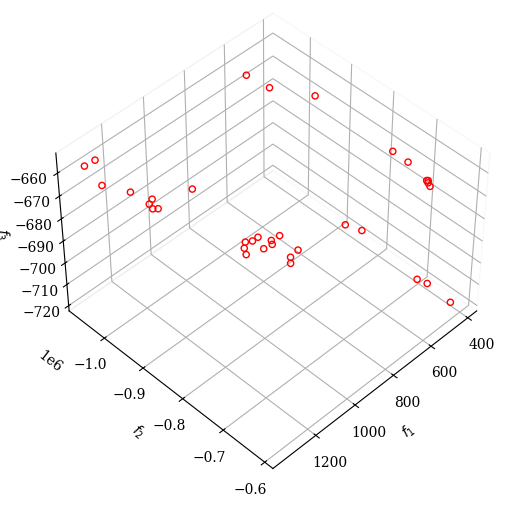

In [ ]:
# Visualisasi Pareto front
plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
#@title evaluasi di paper pymoo
# Import modules yang diperlukan
import joblib
from pymoo.indicators.hv import HV
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD

F = res.F  # F adalah nilai fungsi tujuan dari solusi

print("Hasil X (solusi) optimasi:")
print(X)
print("Nilai fungsi tujuan (F):")
print(F)


F_optimal = np.unique(F, axis=0)
print("Nilai optimal dari fungsi tujuan (F):")
print(F_optimal)

# Menghitung Generational Distance (GD)
gd = GD(F_optimal)
generational_distance = gd(F)
print("Generational Distance (GD):", generational_distance)

# Menghitung Inverted Generational Distance (IGD)
igd = IGD(F_optimal)
inverted_generational_distance = igd(F)
print("Inverted Generational Distance (IGD):", inverted_generational_distance)

# Hypervolume
# `ref_point` berdasarkan margin kecil lebih buruk dari solusi terburuk di setiap tujuan
ref_point = np.max(F, axis=0) + [100, -50000, -10]
print("Referensi Point (ref_point):", ref_point)

# Hitung Hypervolume
hv = HV(ref_point=ref_point)
hypervolume = hv(F)
print("Hypervolume:", hypervolume)


Hasil X (solusi) optimasi:
[[1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 ...
 [ 612  833 1159 ...   -1   -1   -1]
 [ 188   11  423 ...   -1   -1   -1]
 [ 673 1017 1161 ...   -1   -1   -1]]
Nilai fungsi tujuan (F):
[[    1240.  -958520.     -667.]
 [    1260.  -993779.     -665.]
 [    1345. -1017934.     -660.]
 [    1346. -1060425.     -657.]
 [    1151.  -769713.     -670.]
 [    1240.  -950281.     -668.]
 [    1233.  -939869.     -667.]
 [    1231.  -955436.     -665.]
 [     958.  -758068.     -682.]
 [     971.  -751529.     -683.]
 [    1079.  -777150.     -668.]
 [    1126.  -783949.     -668.]
 [    1105.  -777310.     -668.]
 [    1012.  -758074.     -669.]
 [    1307. -1054218.     -656.]
 [    1049.  -759914.     -669.]
 [    1073.  -766495.     -672.]
 [     922.  -757359.     -681.]
 [    1081.  -933706.     -667.]
 [    1142.  -778820.     -669.]
 [    1045.  -759890.     -671.]
 [     557. -1002169.     -

In [ ]:
#@title evaluasi
# # Dapatkan Pareto Front (Front Domination 1)
# # res.F #menyimpan semua solusi non-dominated (atau Front Domination 1) yang ditemukan oleh NSGA-II.

# # Ambil rute (variabel keputusan) dan objektif dari Pareto Front

pareto_routes = res.X  # Variabel keputusan (rute)

pareto_objectives = res.F  # Nilai objektif
print("Solusi Pareto",pareto_routes)

import pandas as pd

solusi_normalin = unflatten(pareto_routes)
print("Solusi List :",solusi_normalin)

# Siapkan list untuk menyimpan hasil ke dalam variabel `result`
result = []


filename = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/evaluasi pareto_tegalkota50pop50gen.txt'

with open(filename, 'w') as file:
  file.write("Solusi Pareto\n")


  # Loop melalui setiap solusi Pareto
  for i, (subroute, objectives) in enumerate(zip(solusi_normalin, pareto_objectives), start=1):
      file.write(f"Solusi Rute ke {i}:")
      file.write(f"Route: {subroute}")
      file.write(f"  Nilai objektif: {objectives}")


      # Loop setiap kendaraan dalam rute
      for num, vehicle in enumerate(subroute):
          total_distance_vehicle = 0
          total_time_vehicle = 0
          total_penalty_vehicle = 0
          total_inspection_vehicle = 0

          # # Loop setiap hari dalam rute kendaraan
          file.write(f"--- Sub Rute {i} Kendaraan {num+1} = {vehicle} ---  \n")

          for day, subroute in enumerate(vehicle):
              file.write(f"  Hari {day+1} \n")
              file.write(f"    Sub Rute: {subroute} \n")


              # Hitung jarak, waktu, dan denda untuk setiap subrute
              distance, time = calculate_total_distance_and_time(
                  subroute, distance_matrix, vehicle_speed,
                  inspection_duration, uncertain_time_delay, depot=0
              )
              penalty = calculate_total_denda(
                  subroute, customer_kwh, customer_id_to_index
              )

              file.write(f"      Total Inpeksi: {len(subroute)} -- Total Waktu: {time} -- Total Jarak: {distance} -- Total Denda: {penalty}  \n")
              file.write(f"      ")

              # Akumulasi hasil
              total_distance_vehicle += distance
              total_time_vehicle += time
              total_penalty_vehicle += penalty
              total_inspection_vehicle += len(subroute)

          # Tambahkan hasil per kendaraan ke dalam list `result`
          result.append({
              "Solusi": i,
              "Kendaraan": num + 1,
              "Total Jarak": total_distance_vehicle,
              "Total Waktu": total_time_vehicle,
              "Total Denda": total_penalty_vehicle,
              "Total Inspeksi": total_inspection_vehicle
          })

          # Tampilkan hasil untuk setiap kendaraan
          file.write(f"  Kendaraan {num + 1}  \n")
          file.write(f"    Total Jarak: {total_distance_vehicle} \n")
          file.write(f"    Total Waktu: {total_time_vehicle} \n")
          file.write(f"    Total Denda: {total_penalty_vehicle} \n")
          file.write(f"    Total Inspeksi: {total_inspection_vehicle} \n")


from google.colab import files

# Mengunduh file teks
files.download(filename)


# Buat DataFrame dari `result`
df = pd.DataFrame(result)

# Tampilkan DataFrame untuk evaluasi
print(df)

# (Opsional) Simpan DataFrame ke file CSV
df.to_csv('/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/tegalkota_nsga2_result_50pop50gen.csv', index=False)


Solusi Pareto [[1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1246 1200  635 ...   -1   -1   -1]
 ...
 [ 612  833 1159 ...   -1   -1   -1]
 [ 188   11  423 ...   -1   -1   -1]
 [ 673 1017 1161 ...   -1   -1   -1]]
Solusi List : [[[[1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415], [612, 14, 771, 188, 11, 662, 766, 1159, 1153, 1215, 423, 1163, 313, 627, 609, 10, 635, 243], [252, 985, 25, 615, 628, 473, 1116, 636, 15, 663, 102, 648, 797, 858, 17, 647, 651, 258], [155, 659, 777, 1147, 1187, 351, 831, 984, 309, 416, 619, 668, 549, 23, 316, 1165, 630, 967], [54, 693, 949, 945, 657, 703, 1188, 187, 1205, 608, 130, 531, 764, 773, 546, 672, 655, 27], [59, 724, 1152, 779, 487, 909, 169, 98, 20, 159, 1018, 4, 989, 829, 927, 972, 600], [1072, 60, 390, 527, 695, 485, 420, 599, 386, 1154, 589, 1176, 1193, 954, 67, 45, 1004], [9, 55, 796, 126, 918, 762, 555, 717, 339, 745, 686, 466, 38, 92, 88, 448, 76], [513, 743, 1189, 455, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

    Solusi  Kendaraan  Total Jarak  Total Waktu  Total Denda  Total Inspeksi
0        1          1   504.367786  8781.551679     507848.0             341
1        1          2   735.442838  8753.164257     450672.0             326
2        2          1   525.795170  8763.692754     536356.0             339
3        2          2   734.677459  8752.016188     457423.0             326
4        3          1   566.225694  8724.338541     592356.0             335
..     ...        ...          ...          ...          ...             ...
65      33          2   279.582333  8069.373500     371790.0             326
66      34          1   193.728367  8240.592550     495062.0             338
67      34          2   304.790918  7982.186377     423297.0             321
68      35          1   215.256583  8797.884874     323854.0             359
69      35          2   209.186310  8788.779465     289349.0             359

[70 rows x 6 columns]


In [ ]:
#@title visualisasi
import plotly.graph_objects as go
import pandas as pd

def visualize_route_with_depot(vehicle_routes, data):
    """
    Visualisasi rute kendaraan dengan titik depot menggunakan Plotly dengan hover text untuk nomor pelanggan.

    Parameters:
    - vehicle_routes: dict dengan key sebagai nama kendaraan dan value sebagai list nomor rute,
                      misalnya: {'Kendaraan 0': [0.0, 1181.0, 1174.0, ...], 'Kendaraan 1': [0.0, 506.0, 523.0, ...]}
    - data: DataFrame yang berisi kolom 'No', 'KOORDINAT_X', dan 'KOORDINAT_Y'
    """
    def get_coordinates_with_hover_text(route_numbers, data):
        coordinates = []
        hover_texts = []
        for num in route_numbers:
            row = data[data['No'] == num]
            if not row.empty:
                x, y = row['KOORDINAT_X'].values[0], row['KOORDINAT_Y'].values[0]
                coordinates.append((x, y))
                hover_texts.append(f"Pelanggan: {int(num)}")
        return coordinates, hover_texts

    fig = go.Figure()

    # Loop untuk setiap kendaraan dalam rute
    for vehicle_name, route_numbers in vehicle_routes.items():
        coordinates, hover_texts = get_coordinates_with_hover_text(route_numbers, data)
        fig.add_trace(go.Scatter(
            x=[coord[0] for coord in coordinates],
            y=[coord[1] for coord in coordinates],
            mode='lines+markers',
            name=vehicle_name,
            text=hover_texts,
            hoverinfo='text'
        ))

    # Tambahkan titik depot
    depot_row = data[data['No'] == 0]
    if not depot_row.empty:
        depot_x, depot_y = depot_row['KOORDINAT_X'].values[0], depot_row['KOORDINAT_Y'].values[0]
        fig.add_trace(go.Scatter(
            x=[depot_x],
            y=[depot_y],
            mode='markers',
            name='Depot',
            marker=dict(size=14, color='black', symbol='star'),
            text="Depot",
            hoverinfo='text'
        ))

    # Konfigurasi tampilan
    fig.update_layout(
        title="Visualisasi Rute dengan Depot",
        xaxis_title="Koordinat X",
        yaxis_title="Koordinat Y",
        legend_title="Kendaraan"
    )

    fig.show()



In [ ]:
# Contoh penggunaan fungsi
vehicle_routes = {
    'Kendaraan 0': [0, 1247, 1232, 121, 1182, 884, 892, 838, 792, 293, 306, 765, 1200, 545, 1246, 460, 910, 172, 415, 0 ],
    'Kendaraan 1': [0, 338, 885, 947, 525, 862, 788, 90, 911, 28, 53, 679, 674, 684, 117, 732, 285, 38,55, 0]
}

# Panggil fungsi dengan data
visualize_route_with_depot(vehicle_routes, data)


### POP 100

In [ ]:
#@title pop 100 ;gen 55; 3 obj; 20 day

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from joblib import Parallel, delayed
import time
import numpy as np
import os
import joblib

# Fungsi evaluasi solusi dengan banyak objektif dan logging
def evaluate_solution(solution):
    # Evaluasi solusi untuk mendapatkan nilai objektif dan constraint
    result = problem.evaluate(solution, return_values_of=["F", "G"])

    # Ambil bagian nilai objektif (F) dari hasil
    objective_values = result[0]  # Ambil array tujuan (F)

    # Pastikan output adalah numpy array 1D
    objective_values = np.array(objective_values).flatten()

    # Debug: Cetak hasil evaluasi untuk memastikan
    # print(f"Evaluasi solusi: {objective_values}")

    # Validasi apakah hasilnya array numpy 1D
    if not isinstance(objective_values, np.ndarray) or objective_values.ndim != 1:
        raise ValueError(f"Hasil evaluasi tidak valid: {objective_values}")

    return objective_values


def parallel_evaluation(algorithm, population, chunk_size=20):
    # print(f"Evaluasi paralel dimulai untuk {len(population)} solusi...")

    # Bagi populasi ke dalam chunk dengan ukuran tertentu
    chunks = [population[i:i + chunk_size] for i in range(0, len(population), chunk_size)]

    # Evaluasi setiap chunk secara paralel
    results = []
    for chunk in chunks:
        chunk_results = Parallel(n_jobs=-1)(
            delayed(evaluate_solution)(ind.X) for ind in chunk
        )
        results.extend(chunk_results)  # Gabungkan hasil dari setiap chunk

    # Set hasil evaluasi kembali ke populasi
    for ind, res in zip(population, results):
        ind.F = res

    # print("Evaluasi selesai.")




# Callback untuk logging dan menyimpan hasil setiap 10 generasi
def callback(algorithm):
    if algorithm.n_gen % 10 == 0:
        path_joblib = f'/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_{algorithm.n_gen}.joblib'
        joblib.dump(algorithm.pop, path_joblib)
        print(f"Model disimpan pada generasi {algorithm.n_gen} di {path_joblib}")


# Konfigurasi NSGA-II
n_gen = 55  # Jumlah generasi
pop_size = 100  # Ukuran populasi

print(f"Jumlah core CPU yang tersedia: {os.cpu_count()}")

print("Memulai NSGA-II dengan Evaluasi Paralel...")
start_time = time.time()

# Inisialisasi algoritma NSGA-II
algorithm = NSGA2(
    pop_size=pop_size,
    sampling=CustomRouteSampling(
        customer=customer,
        min_customers_per_route=min_customer_in_route,
        working_hours=working_hours,
        vehicle_speed=vehicle_speed,
        inspection_duration=inspection_duration,
        uncertain_time_delay=uncertain_time_delay,
        workdays=work_days,
        n_vehicles=n_vehicles
    ),
    crossover=CustomCrossoverWithConstraintHandling2(n_gen=n_gen),
    mutation=SelectiveMutation2(distance_matrix, customer_id_to_index, n_gen),
    eliminate_duplicates=True
)

# Jalankan optimasi
print("Jalankan minimize()... seed 42")
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=('n_gen', n_gen),
    seed= 42,
    verbose=True,
    callback=callback
)

# Atur opsi tampilan untuk menghindari notasi ilmiah
np.set_printoptions(suppress=True, precision=0)

# Hitung waktu eksekusi
compute_time = time.time() - start_time
hours, rem = divmod(compute_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Evaluasi Joblib dan chunking ")
print(f"Detail Eksekusi - Populasi: {pop_size}, Generasi: {n_gen}, Hari: {work_days}")
print(f"Waktu Eksekusi: {int(hours)} jam, {int(minutes)} menit, {int(seconds)} detik")

# Tampilkan hasil akhir
print("Solusi optimal:", res.X)
print("Nilai objektif:", res.F)

# Visualisasi Pareto front
Scatter().add(res.F).show()

#title simpan hasil

# Path untuk menyimpan hasil di Google Drive
path_joblib = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_100pop_55gen_rand42.joblib'

# Simpan hasil menggunakan joblib
joblib.dump(res, path_joblib)

print("Hasil optimasi berhasil disimpan dengan joblib di Google Drive.")


Jumlah core CPU yang tersedia: 8
Memulai NSGA-II dengan Evaluasi Paralel...
Jalankan minimize()... seed 42
Rute yang terpilih [1.0, 11.0, 53.0, 36.0, 59.0, 39.0, 17.0, 52.0, 70.0, 42.0, 30.0, 19.0, 41.0, 37.0, 43.0, 4.0, 38.0, 14.0, 18.0, 31.0, 2.0, 34.0, 44.0, 3.0, 27.0, 33.0, 54.0, 68.0, 13.0, 65.0, 25.0, 26.0, 16.0, 66.0, 40.0, 28.0, 24.0, 35.0, 60.0, 7.0, 13.0, 63.0, 66.0, 8.0, 31.0, 25.0, 23.0, 4.0, 37.0, 70.0, 51.0, 57.0, 30.0, 68.0, 67.0, 16.0, 61.0, 14.0, 52.0, 41.0, 11.0, 1.0, 33.0, 12.0, 36.0, 6.0, 55.0, 19.0, 9.0, 56.0, 69.0, 42.0, 48.0, 64.0, 40.0, 18.0, 59.0, 58.0, 20.0, 26.0, 51.0, 58.0, 62.0, 50.0, 26.0, 65.0, 34.0, 29.0, 25.0, 67.0, 68.0, 30.0, 60.0, 1.0, 16.0, 15.0, 38.0, 11.0, 27.0, 8.0, 48.0, 2.0, 56.0, 31.0, 45.0, 35.0, 54.0, 53.0, 14.0, 63.0, 13.0, 70.0, 44.0, 9.0, 17.0, 7.0, 39.0, 32.0, 47.0, 41.0, 26.0, 43.0, 51.0, 32.0, 41.0, 35.0, 2.0, 31.0, 63.0, 20.0, 18.0, 19.0, 37.0, 5.0, 48.0, 69.0, 30.0, 13.0, 10.0, 52.0, 46.0, 40.0, 38.0, 12.0, 66.0, 49.0, 3.0, 70.0, 54.

In [ ]:
#@title reload dari gen 20
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import time
import numpy as np
import joblib
import os

# Path file joblib dari generasi terakhir
previous_path = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_20.joblib'

# Muat populasi sebelumnya
previous_population = joblib.load(previous_path)
print(f"Populasi dari generasi ke-20 berhasil dimuat dari {previous_path}")

# Callback untuk logging dan menyimpan hasil setiap 10 generasi
def callback(algorithm):
    if algorithm.n_gen % 10 == 0:
        path_joblib = f'/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_{algorithm.n_gen}_reload.joblib'
        joblib.dump(algorithm.pop, path_joblib)
        print(f"Model disimpan pada generasi {algorithm.n_gen} di {path_joblib}")

# Konfigurasi NSGA-II
total_gen = 55  # Jumlah total generasi
current_gen = 20  # Generasi terakhir yang disimpan
remaining_gen = total_gen - current_gen  # Sisa generasi yang harus dijalankan
pop_size = 100  # Ukuran populasi

print(f"Jumlah core CPU yang tersedia: {os.cpu_count()}")

print(f"Melanjutkan NSGA-II dari generasi ke-{current_gen + 1} hingga generasi ke-{total_gen}...")
start_time = time.time()

# Inisialisasi algoritma NSGA-II
algorithm = NSGA2(
    pop_size=pop_size,
    sampling=previous_population,  # Muat populasi sebelumnya
    crossover=CustomCrossoverWithConstraintHandling2(n_gen=total_gen),
    mutation=SelectiveMutation2(distance_matrix, customer_id_to_index, total_gen),
    eliminate_duplicates=True
)

# Jalankan optimasi
print("Lanjutkan minimize()... seed 42")
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=('n_gen', remaining_gen),  # Jalankan sisa generasi
    seed=42,
    verbose=True,
    callback=callback
)

# Atur opsi tampilan untuk menghindari notasi ilmiah
np.set_printoptions(suppress=True, precision=0)

# Hitung waktu eksekusi
compute_time = time.time() - start_time
hours, rem = divmod(compute_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Evaluasi dilanjutkan dari generasi ke-{current_gen + 1}")
print(f"Detail Eksekusi - Populasi: {pop_size}, Generasi: {remaining_gen}, Hari: {work_days}")
print(f"Waktu Eksekusi: {int(hours)} jam, {int(minutes)} menit, {int(seconds)} detik")

# Tampilkan hasil akhir
print("Solusi optimal:", res.X)
print("Nilai objektif:", res.F)

# Visualisasi Pareto front
Scatter().add(res.F).show()

# Path untuk menyimpan hasil akhir
final_path = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_100pop_55gen_rand42.joblib'

# Simpan hasil menggunakan joblib
joblib.dump(res, final_path)

print("Hasil optimasi berhasil disimpan dengan joblib di Google Drive.")


Populasi dari generasi ke-20 berhasil dimuat dari /content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_20.joblib
Jumlah core CPU yang tersedia: 8
Melanjutkan NSGA-II dari generasi ke-21 hingga generasi ke-55...
Lanjutkan minimize()... seed 42
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |        0 |     34 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      100 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0009106949 |             f
     3 |      200 |     36 |  0.000000E+00 |  0.000000E+00 |  0.0019226362 |             f
     4 |      300 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0043764666 |             f
     5 |      400 |     37 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |      500 |     38 |  0.000000E+00 |  0.000000E+00 |  0.0004198352 |             f
     7 |      600 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0028494706 |  

In [ ]:
#@title reload dari gen 30
#@title reload
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import time
import numpy as np
import joblib
import os

# Path file joblib dari generasi terakhir
previous_path = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_10_reload.joblib'

# Muat populasi sebelumnya
previous_population = joblib.load(previous_path)
print(f"Populasi dari generasi ke-20 + 10 berhasil dimuat dari {previous_path}")

# Callback untuk logging dan menyimpan hasil setiap 10 generasi
def callback(algorithm):
    if algorithm.n_gen % 10 == 0:
        path_joblib = f'/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_{algorithm.n_gen}_reload2.joblib'
        joblib.dump(algorithm.pop, path_joblib)
        print(f"Model disimpan pada generasi {algorithm.n_gen} di {path_joblib}")

# Konfigurasi NSGA-II
total_gen = 55  # Jumlah total generasi
current_gen = 30  # Generasi terakhir yang disimpan
remaining_gen = total_gen - current_gen  # Sisa generasi yang harus dijalankan
pop_size = 100  # Ukuran populasi

print(f"Jumlah core CPU yang tersedia: {os.cpu_count()}")

print(f"Melanjutkan NSGA-II dari generasi ke-{current_gen + 1} hingga generasi ke-{total_gen}...")
start_time = time.time()

# Inisialisasi algoritma NSGA-II
algorithm = NSGA2(
    pop_size=pop_size,
    sampling=previous_population,  # Muat populasi sebelumnya
    crossover=CustomCrossoverWithConstraintHandling2(n_gen=total_gen),
    mutation=SelectiveMutation3(distance_matrix, customer_id_to_index, total_gen),
    eliminate_duplicates=True
)

# Jalankan optimasi
print("Lanjutkan minimize()... seed 42")
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=('n_gen', remaining_gen),  # Jalankan sisa generasi
    seed=42,
    verbose=True,
    callback=callback
)

# Atur opsi tampilan untuk menghindari notasi ilmiah
np.set_printoptions(suppress=True, precision=0)

# Hitung waktu eksekusi
compute_time = time.time() - start_time
hours, rem = divmod(compute_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Evaluasi dilanjutkan dari generasi ke-{current_gen + 1}")
print(f"Detail Eksekusi - Populasi: {pop_size}, Generasi: {remaining_gen}, Hari: {work_days}")
print(f"Waktu Eksekusi: {int(hours)} jam, {int(minutes)} menit, {int(seconds)} detik")

# Tampilkan hasil akhir
print("Solusi optimal:", res.X)
print("Nilai objektif:", res.F)

# Visualisasi Pareto front
Scatter().add(res.F).show()

# Path untuk menyimpan hasil akhir
final_path = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_100pop_55gen_rand42.joblib'

# Simpan hasil menggunakan joblib
joblib.dump(res, final_path)

print("Hasil optimasi berhasil disimpan dengan joblib di Google Drive.")


Populasi dari generasi ke-20 + 10 berhasil dimuat dari /content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop_gen_10_reload.joblib
Jumlah core CPU yang tersedia: 8
Melanjutkan NSGA-II dari generasi ke-31 hingga generasi ke-55...
Lanjutkan minimize()... seed 42
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |        0 |     38 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      100 |     31 |  0.000000E+00 |  0.000000E+00 |  0.0306099370 |         ideal
     3 |      200 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0069190369 |         ideal
     4 |      300 |     38 |  0.000000E+00 |  0.000000E+00 |  0.0027322677 |         ideal
     5 |      400 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0088806656 |         ideal
     6 |      500 |     43 |  0.000000E+00 |  0.000000E+00 |  0.0030360453 |             f
     7 |      600 |     41 |  0.000000E+00 |  0.000000E+00 |  0.00

In [ ]:
#@title load hasil
import joblib

# Path file joblib di Google Drive
path_joblib_3obj_100pop_100gen_01 = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/nsga2_result_3obj_100pop_55gen_rand42.joblib'

# Load hasil dari joblib
res = joblib.load(path_joblib_3obj_100pop_100gen_01)

# Cek dan tampilkan nilai X (solusi)
X = res.X
print("Hasil X (solusi) optimasi:")
print(X)


Hasil X (solusi) optimasi:
[[1247 1232  121 ...   -1   -1   -1]
 [  11  214  601 ...   -1   -1   -1]
 [ 804  931  482 ...   -1   -1   -1]
 ...
 [1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]]


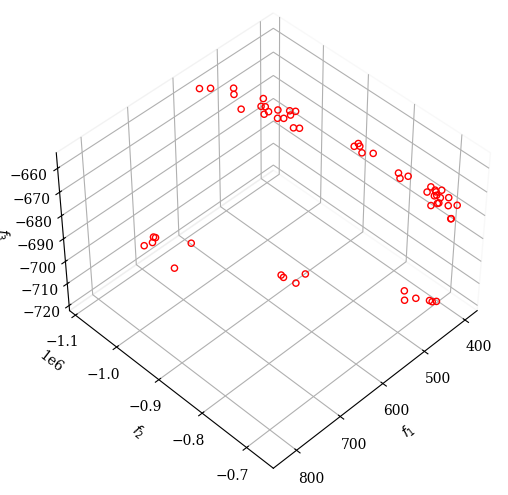

In [ ]:
# Visualisasi Pareto front
plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
#@title evaluasi
# # Dapatkan Pareto Front (Front Domination 1)
# # res.F #menyimpan semua solusi non-dominated (atau Front Domination 1) yang ditemukan oleh NSGA-II.

# # Ambil rute (variabel keputusan) dan objektif dari Pareto Front

pareto_routes = res.X  # Variabel keputusan (rute)

pareto_objectives = res.F  # Nilai objektif
print("Solusi Pareto",pareto_routes)

import pandas as pd

solusi_normalin = unflatten(pareto_routes)
print("Solusi List :",solusi_normalin)

# Siapkan list untuk menyimpan hasil ke dalam variabel `result`
result = []


filename = '/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/evaluasi pareto_100pop.txt'

with open(filename, 'w') as file:
  file.write("Solusi Pareto\n")


  # Loop melalui setiap solusi Pareto
  for i, (subroute, objectives) in enumerate(zip(solusi_normalin, pareto_objectives), start=1):
      file.write(f"Solusi Rute ke {i}:")
      file.write(f"Route: {subroute}")
      file.write(f"  Nilai objektif: {objectives}")


      # Loop setiap kendaraan dalam rute
      for num, vehicle in enumerate(subroute):
          total_distance_vehicle = 0
          total_time_vehicle = 0
          total_penalty_vehicle = 0
          total_inspection_vehicle = 0

          # # Loop setiap hari dalam rute kendaraan
          file.write(f"--- Sub Rute {i} Kendaraan {num+1} = {vehicle} ---  \n")

          for day, subroute in enumerate(vehicle):
              file.write(f"  Hari {day+1} \n")
              file.write(f"    Sub Rute: {subroute} \n")


              # Hitung jarak, waktu, dan denda untuk setiap subrute
              distance, time = calculate_total_distance_and_time(
                  subroute, distance_matrix, vehicle_speed,
                  inspection_duration, uncertain_time_delay, depot=0
              )
              penalty = calculate_total_denda(
                  subroute, customer_kwh, customer_id_to_index
              )

              file.write(f"      Total Inpeksi: {len(subroute)} -- Total Waktu: {time} -- Total Jarak: {distance} -- Total Denda: {penalty}  \n")
              file.write(f"      ")

              # Akumulasi hasil
              total_distance_vehicle += distance
              total_time_vehicle += time
              total_penalty_vehicle += penalty
              total_inspection_vehicle += len(subroute)

          # Tambahkan hasil per kendaraan ke dalam list `result`
          result.append({
              "Solusi": i,
              "Route": subroute,
              "Kendaraan": num + 1,
              "Total Jarak": total_distance_vehicle,
              "Total Waktu": total_time_vehicle,
              "Total Denda": total_penalty_vehicle,
              "Total Inspeksi": total_inspection_vehicle
          })

          # Tampilkan hasil untuk setiap kendaraan
          file.write(f"  Kendaraan {num + 1}  \n")
          file.write(f"    Total Jarak: {total_distance_vehicle} \n")
          file.write(f"    Total Waktu: {total_time_vehicle} \n")
          file.write(f"    Total Denda: {total_penalty_vehicle} \n")
          file.write(f"    Total Inspeksi: {total_inspection_vehicle} \n")


from google.colab import files

# Mengunduh file teks
files.download(filename)


# Buat DataFrame dari `result`
df = pd.DataFrame(result)

# Tampilkan DataFrame untuk evaluasi
print(df)

# (Opsional) Simpan DataFrame ke file CSV
df.to_csv('/content/drive/My Drive/tesis/Hasil Optimasi/3obj/addconstraint/rand42/nsga2_result_100pop.csv', index=False)


Solusi Pareto [[1247 1232  121 ...   -1   -1   -1]
 [  11  214  601 ...   -1   -1   -1]
 [ 804  931  482 ...   -1   -1   -1]
 ...
 [1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]
 [1247 1232  121 ...   -1   -1   -1]]
Solusi List : [[[[1247, 1232, 121, 1182, 884, 892, 838, 792, 306, 293, 765, 1246, 1200, 545, 460, 172, 910, 415], [612, 1159, 627, 768, 423, 11, 14, 188, 662, 771, 766, 609, 10, 313, 1215, 1153, 1163, 635], [252, 102, 615, 636, 473, 15, 985, 25, 243, 858, 797, 1116, 757, 820, 628, 663, 648, 17], [647, 651, 659, 777, 867, 1147, 351, 258, 155, 416, 619, 984, 831, 668, 1187, 309, 561, 549], [316, 531, 187, 945, 608, 1205, 657, 949, 703, 967, 54, 693, 130, 23, 1188, 630, 1165, 764], [779, 159, 98, 169, 27, 59, 655, 487, 724, 672, 20, 909, 1018, 546, 1152, 773, 4], [989, 1154, 527, 485, 695, 390, 972, 420, 589, 386, 829, 600, 864, 1072, 599, 60, 1176], [918, 67, 762, 796, 555, 1193, 1004, 717, 45, 9, 126, 686, 745, 954, 55, 339, 466], [38, 743, 304, 118

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Solusi                                              Route  Kendaraan  \
0         1  [952, 661, 315, 227, 783, 961, 938, 403, 1141,...          1   
1         1  [1233, 953, 1195, 1227, 839, 926, 1109, 618, 4...          2   
2         2  [1246, 293, 172, 434, 938, 1174, 1150, 1128, 4...          1   
3         2  [607, 566, 676, 1229, 1192, 1239, 1242, 1211, ...          2   
4         3  [4, 1072, 372, 103, 244, 616, 613, 1162, 1164,...          1   
..      ...                                                ...        ...   
111      56  [1050, 356, 97, 115, 578, 836, 221, 821, 1110,...          2   
112      57  [616, 21, 1026, 122, 784, 804, 433, 1194, 1025...          1   
113      57  [934, 359, 355, 507, 175, 957, 886, 701, 1202,...          2   
114      58  [616, 21, 1026, 122, 784, 804, 433, 1194, 1025...          1   
115      58  [934, 1087, 84, 1243, 1006, 624, 772, 951, 110...          2   

     Total Jarak  Total Waktu  Total Denda  Total Inspeksi  
0     185.9540

In [40]:
#@title solusi yang mau digambarin

solusi1 = [[[1247, 1232, 121, 1182, 884, 892, 838, 792, 306, 293, 765, 1246, 1200, 545, 460, 172, 910, 415], [612, 1159, 627, 768, 423, 11, 14, 188, 662, 771, 766, 609, 10, 313, 1215, 1153, 1163, 635], [252, 102, 615, 636, 473, 15, 985, 25, 243, 858, 797, 1116, 757, 820, 628, 663, 648, 17], [647, 651, 659, 777, 867, 1147, 351, 258, 155, 416, 619, 984, 831, 668, 1187, 309, 561, 549], [316, 531, 187, 945, 608, 1205, 657, 949, 703, 967, 54, 693, 130, 23, 1188, 630, 1165, 764], [779, 159, 98, 169, 27, 59, 655, 487, 724, 672, 20, 909, 1018, 546, 1152, 773, 4], [989, 1154, 527, 485, 695, 390, 972, 420, 589, 386, 829, 600, 864, 1072, 599, 60, 1176], [918, 67, 762, 796, 555, 1193, 1004, 717, 45, 9, 126, 686, 745, 954, 55, 339, 466], [38, 743, 304, 1189, 1035, 448, 31, 76, 88, 92, 882, 1203, 975, 455, 513, 22, 1201], [96, 144, 469, 973, 1190, 964, 268, 224, 1164, 388, 748, 699, 610, 263, 583, 595, 605], [1204, 720, 106, 1225, 857, 887, 1166, 1198, 679, 551, 1162, 613, 501, 218, 1064, 202, 760], [49, 1021, 1024, 1226, 620, 109, 127, 719, 99, 58, 1027, 947, 1002, 732, 53, 28, 911], [851, 1194, 1025, 196, 284, 976, 463, 64, 245, 1216, 170, 616, 21, 617, 112, 804], [71, 925, 449, 1062, 931, 229, 614, 122, 1136, 1158, 1183, 488, 225, 673, 993, 677, 744], [475, 482, 428, 380, 90, 415, 692, 852, 948, 1184, 134, 512, 186, 727, 235, 815, 1249], [87, 1108, 1012, 810, 1121, 775, 806, 1100, 141, 1161, 214, 601, 108, 763, 1172, 24, 63], [111, 963, 43, 1171, 917, 430, 259, 1130, 451, 1036, 1209, 1208, 197, 650, 409, 1041], [1093, 1155, 391, 358, 206, 107, 139, 342, 781, 1245, 866, 1175, 119, 667, 1078, 1191], [353, 348, 434, 1200, 1246, 1212, 247, 194, 327, 1, 940, 795, 1128, 1150, 1174, 86], [952, 661, 315, 227, 783, 961, 938, 403, 1141, 702, 905, 44, 75, 314, 125, 1031]], [[432, 1122, 2, 396, 1151, 751, 723, 666, 670, 394, 621, 1096, 567, 1248, 792, 1047, 835], [1083, 1160, 944, 892, 168, 402, 158, 163, 664, 341, 504, 69, 1111, 950, 307], [1020, 256, 1013, 813, 269, 1145, 1088, 814, 718, 560, 456, 656, 738, 562, 929, 154, 649], [1182, 883, 65, 596, 180, 209, 1186, 40, 338, 1169, 1156, 939, 965, 253, 598, 176, 474], [530, 216, 572, 41, 1127, 922, 1115, 644, 377, 489, 575, 1135, 414, 129, 478, 755, 710], [355, 340, 118, 537, 507, 175, 886, 902, 1202, 1104, 624, 1243, 524, 894, 832, 1087, 1148], [311, 642, 203, 401, 678, 704, 841, 1070, 593, 1207, 563, 495, 496, 238, 153], [747, 145, 554, 928, 1230, 95, 1214, 1003, 565, 1040, 876, 178, 533, 736, 808, 147], [1119, 746, 1140, 440, 336, 570, 682, 962, 376, 1181, 375, 778, 1219, 93, 523], [896, 1167, 1241, 211, 582, 1240, 502, 335, 850, 729, 164, 591, 46, 276, 346, 540], [1244, 1238, 231, 26, 481, 371, 526, 310, 1074, 571, 1033, 1098, 846, 1118, 120, 198], [361, 1232, 1038, 1220, 1097, 897, 161, 450, 143, 497, 300, 441, 986, 5, 569, 272], [189, 467, 458, 326, 446, 282, 407, 297, 982, 992, 468, 941, 362, 215, 1046, 1099, 517], [345, 370, 1014, 439, 424, 969, 494, 217, 212, 364, 148, 292, 329, 427, 740, 383, 384], [200, 1139, 994, 453, 1199, 471, 289, 935, 1015, 48, 584, 801, 1055, 135, 419, 734], [330, 872, 476, 694, 774, 157, 848, 226, 996, 726, 204, 1073, 856, 1252, 503, 404], [749, 711, 52, 51, 539, 1254, 506, 741, 1034, 1019, 1251, 803, 131, 978, 1206, 708], [607, 566, 219, 676, 1229, 1192, 1090, 637, 573, 431, 303, 1239, 1242, 854, 421, 73], [1237, 1211, 868, 1235, 1179, 789, 385, 61, 529, 1092, 1250, 1132, 324, 251, 559, 798], [1233, 953, 1195, 1227, 839, 926, 1109, 618, 499, 1101, 298, 411, 824, 1067, 426, 410, 116]]]

In [42]:
#@title per hari

import plotly.graph_objects as go
import pandas as pd

def visualize_routes_for_both_teams(routes, data, day_idx):
    """
    Visualisasi rute untuk kedua tim pada 1 hari kerja dalam 1 grafik.

    Parameters:
    - routes: List berisi rute inspeksi untuk semua tim.
    - data: DataFrame yang berisi kolom 'No', 'KOORDINAT_X', dan 'KOORDINAT_Y'.
    - day_idx: Indeks hari kerja yang ingin divisualisasikan.
    """
    def get_coordinates_with_hover_text(route_numbers, data):
        coordinates = []
        hover_texts = []
        for num in route_numbers:
            row = data[data['No'] == num]
            if not row.empty:
                x, y = row['KOORDINAT_X'].values[0], row['KOORDINAT_Y'].values[0]
                coordinates.append((x, y))
                hover_texts.append(f"Pelanggan: {int(num)}")
        return coordinates, hover_texts

    fig = go.Figure()

    colors = ['blue', 'red']  # Warna untuk membedakan kendaraan

    # Visualisasi untuk setiap tim (kendaraan)
    for team_idx, team_name in enumerate(["Tim 1", "Tim 2"]):
        # Tambahkan 0 di awal dan akhir rute
        day_route = [0] + routes[team_idx][day_idx] + [0]
        coordinates, hover_texts = get_coordinates_with_hover_text(day_route, data)

        fig.add_trace(go.Scatter(
            x=[coord[0] for coord in coordinates],
            y=[coord[1] for coord in coordinates],
            mode='lines+markers',
            name=f"{team_name}, Hari {day_idx + 1}",
            text=hover_texts,
            hoverinfo='text',
            line=dict(color=colors[team_idx])  # Warna berdasarkan kendaraan
        ))

    # Tambahkan titik depot (asumsi nomor depot adalah 0)
    depot_row = data[data['No'] == 0]
    if not depot_row.empty:
        depot_x, depot_y = depot_row['KOORDINAT_X'].values[0], depot_row['KOORDINAT_Y'].values[0]
        fig.add_trace(go.Scatter(
            x=[depot_x],
            y=[depot_y],
            mode='markers',
            name='Depot',
            marker=dict(size=14, color='black', symbol='star'),
            text="Depot",
            hoverinfo='text'
        ))

    # Konfigurasi tampilan
    fig.update_layout(
        title=f"Visualisasi Rute untuk Kedua Tim pada Hari {day_idx + 1}",
        xaxis_title="Koordinat X",
        yaxis_title="Koordinat Y",
        legend_title="Tim"
    )

    fig.show()


# Panggil fungsi untuk setiap hari kerja
for day_idx in range(len(solusi1[0])):  # Loop untuk 20 hari kerja
    visualize_routes_for_both_teams(solusi1, data, day_idx)


FINISH